In [3]:
import pandas as pd
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch

In [6]:
inp = pd.read_csv('./data/erbb1_ligand.csv', names=['SMILES'])

In [7]:
inp['INCHI'] = inp['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
inp = inp.drop_duplicates(subset=['INCHI'], keep='first')

In [10]:
inp.head()

,SMILES,INCHI
0,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(C(...,VLMCAKOBHGIDMO-UHFFFAOYSA-N
1,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc2c...,CLOYTEHRHQRWHY-UHFFFAOYSA-N
2,Br.CC[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1...,KWWJXVLAIYEHNL-GMUIIQOCSA-N
3,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,XESVKZYWJYQTNB-UTONKHPSSA-N
4,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,HWEROSLJZXUCNS-UTONKHPSSA-N


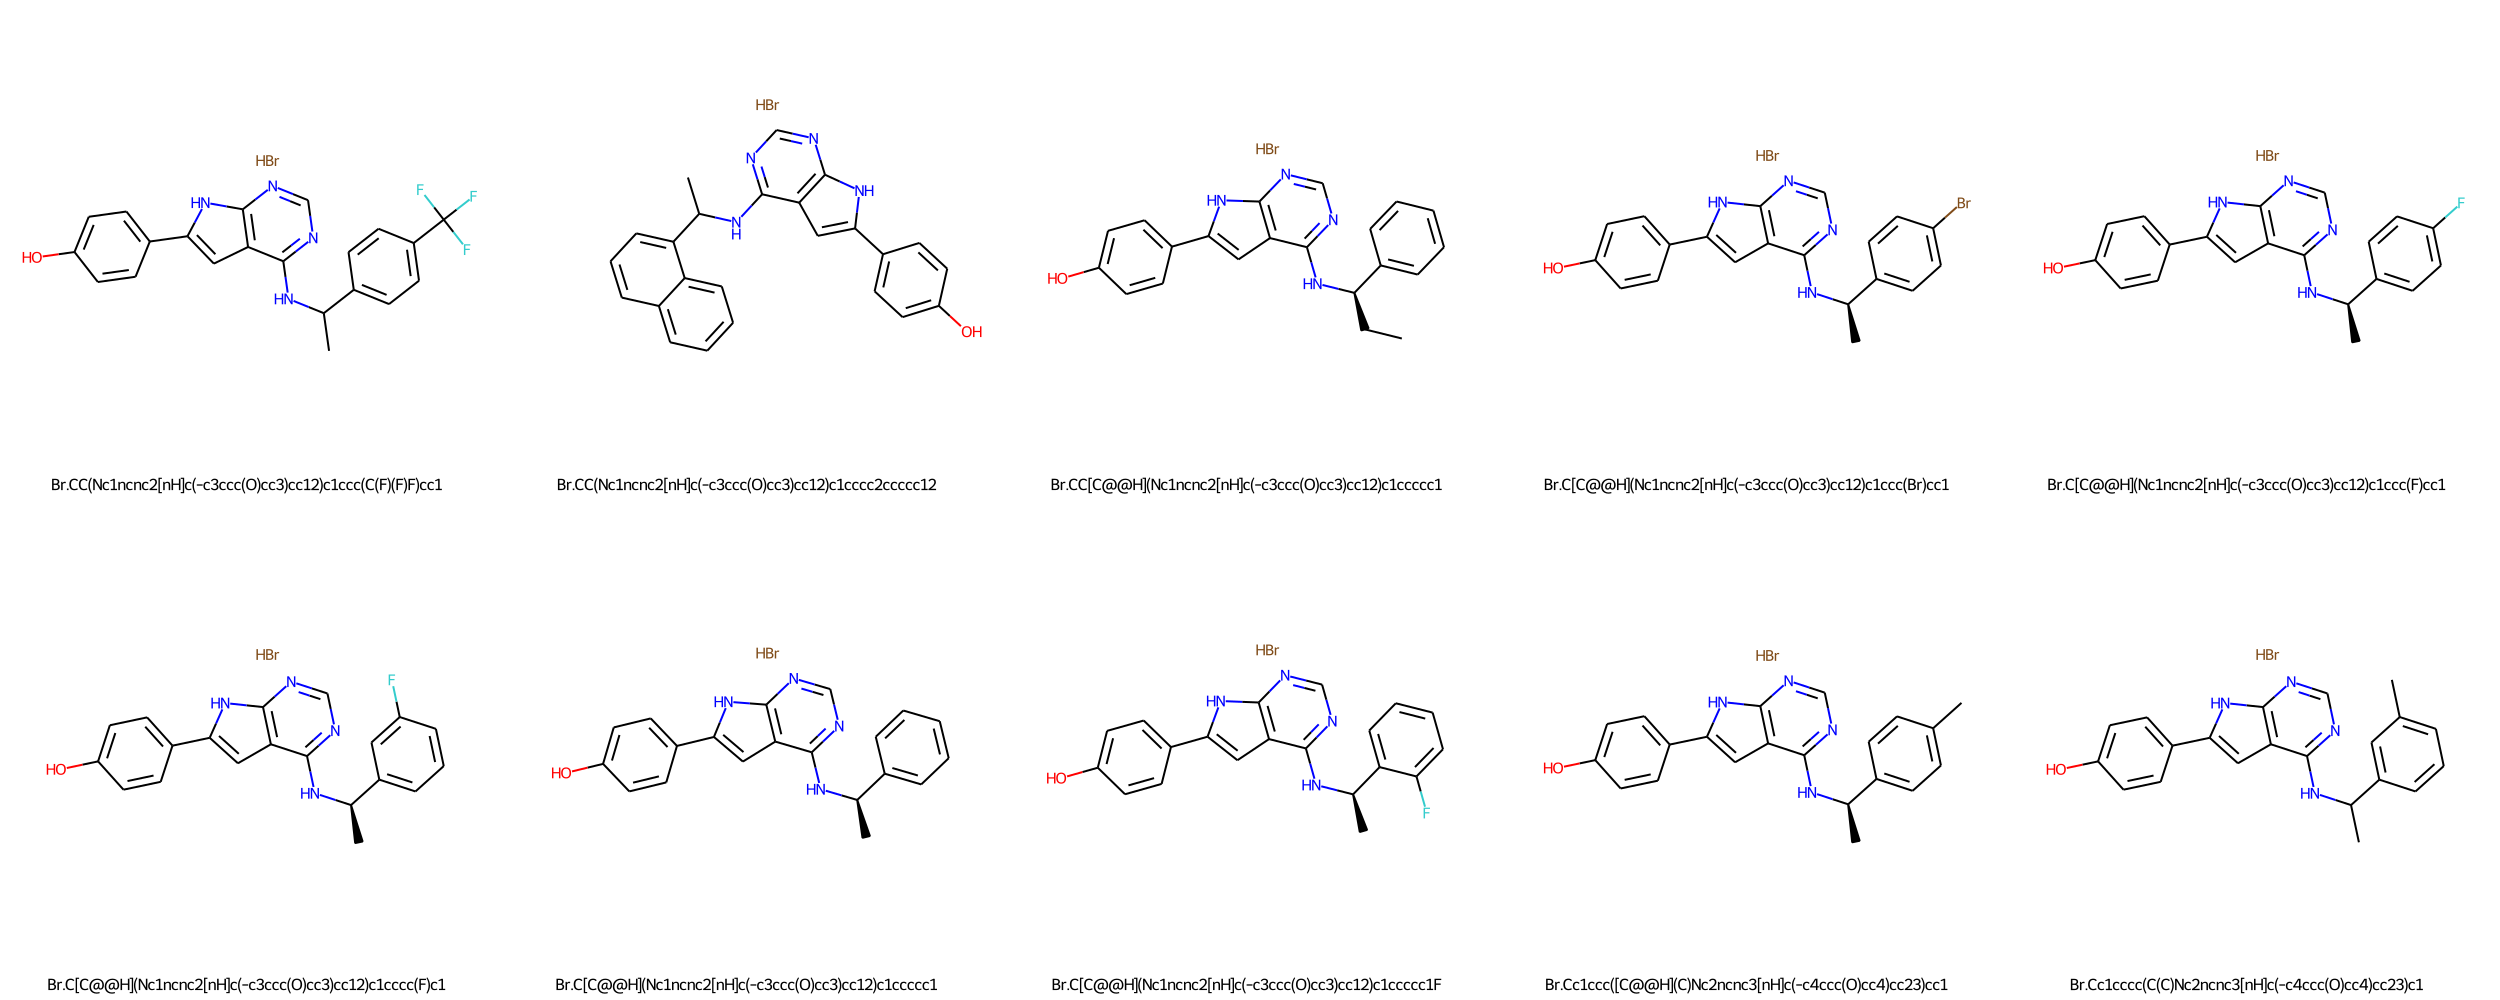

In [9]:
Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(inp['SMILES'])[:10])

## Vocab Generation

In [51]:
from fast_jtnn.mol_tree import main_mol_tree
main_mol_tree('./data/erbb1_ligand.csv', './data/erbb1_vocab.txt')

## Preprocessing
For acceleration in code execution

In [52]:
from fast_molvae.preprocess import main_preprocess
main_preprocess('./data/erbb1_ligand.csv', './fast_molvae/erbb1_processed/', num_splits=100)

Input File read
Tensorizing .....
Tensorizing Complete


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.46it/s]


True

## Training VAE

In [53]:
from fast_molvae.vae_train import main_vae_train
model = main_vae_train('./fast_molvae/erbb1_processed/', './data/erbb1_vocab.txt', './fast_molvae/erbb1_mvae_model/')

/home/zhang/anaconda3/envs/rxtree1/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/zhang/anaconda3/envs/rxtree1/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


JTNNVAE(
  (jtnn): JTNNEncoder(
    (embedding): Embedding(222, 450)
    (outputNN): Sequential(
      (0): Linear(in_features=900, out_features=450, bias=True)
      (1): ReLU()
    )
    (GRU): GraphGRU(
      (W_z): Linear(in_features=900, out_features=450, bias=True)
      (W_r): Linear(in_features=450, out_features=450, bias=False)
      (U_r): Linear(in_features=450, out_features=450, bias=True)
      (W_h): Linear(in_features=900, out_features=450, bias=True)
    )
  )
  (decoder): JTNNDecoder(
    (embedding): Embedding(222, 450)
    (W_z): Linear(in_features=900, out_features=450, bias=True)
    (U_r): Linear(in_features=450, out_features=450, bias=False)
    (W_r): Linear(in_features=450, out_features=450, bias=True)
    (W_h): Linear(in_features=900, out_features=450, bias=True)
    (W): Linear(in_features=478, out_features=450, bias=True)
    (U): Linear(in_features=478, out_features=450, bias=True)
    (U_i): Linear(in_features=900, out_features=450, bias=True)
    (W_o): 

  0%|                                                                                                                                                              | 0/20 [00:00<?, ?it/s]/home/zhang/anaconda3/envs/rxtree1/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/zhang/anaconda3/envs/rxtree1/lib/python3.8/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[50] Beta: 0.000, KL: 192.51, Word: 32.04, Topo: 77.93, Assm: 63.69, PNorm: 99.51, GNorm: 50.00
CUDA out of memory. Tried to allocate 13.88 GiB (GPU 0; 31.75 GiB total capacity; 6.67 GiB already allocated; 11.42 GiB free; 19.13 GiB reserved in total by PyTorch)
[100] Beta: 0.000, KL: 114.30, Word: 38.32, Topo: 84.64, Assm: 68.41, PNorm: 101.48, GNorm: 50.00
[150] Beta: 0.000, KL: 89.65, Word: 45.64, Topo: 87.14, Assm: 62.59, PNorm: 103.42, GNorm: 20.49
list index out of range
[200] Beta: 0.000, KL: 99.42, Word: 38.88, Topo: 87.40, Assm: 71.07, PNorm: 105.20, GNorm: 12.16


  5%|███████▎                                                                                                                                           | 1/20 [07:46<2:27:48, 466.75s/it]

[250] Beta: 0.000, KL: 124.25, Word: 56.86, Topo: 90.75, Assm: 70.81, PNorm: 107.13, GNorm: 50.00
[300] Beta: 0.000, KL: 140.00, Word: 53.67, Topo: 90.12, Assm: 75.87, PNorm: 109.30, GNorm: 44.46
[350] Beta: 0.000, KL: 104.83, Word: 56.49, Topo: 91.62, Assm: 68.46, PNorm: 110.98, GNorm: 17.43
[400] Beta: 0.000, KL: 97.43, Word: 51.35, Topo: 92.75, Assm: 76.15, PNorm: 112.67, GNorm: 13.40


 10%|██████████████▋                                                                                                                                    | 2/20 [16:35<2:31:02, 503.49s/it]

[450] Beta: 0.000, KL: 130.33, Word: 61.73, Topo: 91.55, Assm: 77.68, PNorm: 114.74, GNorm: 44.67
[500] Beta: 0.000, KL: 151.70, Word: 60.40, Topo: 90.96, Assm: 81.59, PNorm: 116.82, GNorm: 37.56
[550] Beta: 0.000, KL: 119.40, Word: 61.35, Topo: 91.39, Assm: 72.57, PNorm: 118.49, GNorm: 17.91


 15%|██████████████████████                                                                                                                             | 3/20 [25:09<2:23:56, 508.05s/it]

list index out of range
[650] Beta: 0.000, KL: 266.70, Word: 123.44, Topo: 184.61, Assm: 161.11, PNorm: 121.93, GNorm: 50.00
[750] Beta: 0.000, KL: 145.42, Word: 66.18, Topo: 93.17, Assm: 77.23, PNorm: 125.34, GNorm: 22.36


 20%|█████████████████████████████▍                                                                                                                     | 4/20 [33:39<2:15:42, 508.90s/it]

list index out of range
[850] Beta: 0.000, KL: 337.03, Word: 133.79, Topo: 186.60, Assm: 166.09, PNorm: 128.43, GNorm: 48.16
[900] Beta: 0.000, KL: 186.71, Word: 70.44, Topo: 94.12, Assm: 86.70, PNorm: 130.25, GNorm: 34.93
[950] Beta: 0.000, KL: 178.32, Word: 69.96, Topo: 93.93, Assm: 80.71, PNorm: 131.67, GNorm: 24.41
index 300 is out of bounds for dimension 0 with size 300
[1000] Beta: 0.000, KL: 184.97, Word: 65.89, Topo: 92.96, Assm: 83.36, PNorm: 133.16, GNorm: 13.87


 25%|████████████████████████████████████▊                                                                                                              | 5/20 [41:36<2:04:17, 497.18s/it]

[1050] Beta: 0.000, KL: 198.29, Word: 74.71, Topo: 94.71, Assm: 87.58, PNorm: 134.80, GNorm: 32.06
[1100] Beta: 0.000, KL: 217.40, Word: 74.00, Topo: 94.62, Assm: 88.43, PNorm: 136.60, GNorm: 27.00
[1150] Beta: 0.000, KL: 209.50, Word: 73.93, Topo: 94.42, Assm: 82.21, PNorm: 138.05, GNorm: 22.87


 30%|████████████████████████████████████████████                                                                                                       | 6/20 [50:01<1:56:40, 500.02s/it]

list index out of range
[1250] Beta: 0.000, KL: 445.46, Word: 146.71, Topo: 188.11, Assm: 175.30, PNorm: 140.96, GNorm: 20.49
[1300] Beta: 0.000, KL: 239.79, Word: 77.25, Topo: 95.15, Assm: 90.26, PNorm: 142.59, GNorm: 28.34
[1350] Beta: 0.000, KL: 238.11, Word: 76.67, Topo: 94.51, Assm: 83.87, PNorm: 143.91, GNorm: 17.45
list index out of range
[1400] Beta: 0.000, KL: 246.76, Word: 72.83, Topo: 93.62, Assm: 86.37, PNorm: 145.16, GNorm: 15.66


 35%|███████████████████████████████████████████████████▍                                                                                               | 7/20 [57:55<1:46:29, 491.46s/it]

[1450] Beta: 0.000, KL: 256.39, Word: 79.29, Topo: 95.35, Assm: 91.73, PNorm: 146.38, GNorm: 26.31
[1500] Beta: 0.000, KL: 269.88, Word: 79.39, Topo: 95.29, Assm: 90.26, PNorm: 147.92, GNorm: 26.72
[1550] Beta: 0.000, KL: 270.74, Word: 77.83, Topo: 95.51, Assm: 84.36, PNorm: 149.17, GNorm: 20.96
list index out of range
[1600] Beta: 0.000, KL: 270.43, Word: 75.37, Topo: 94.49, Assm: 87.42, PNorm: 150.35, GNorm: 18.76


 40%|██████████████████████████████████████████████████████████                                                                                       | 8/20 [1:06:07<1:38:20, 491.74s/it]

[1650] Beta: 0.000, KL: 272.33, Word: 82.26, Topo: 95.89, Assm: 91.68, PNorm: 151.62, GNorm: 26.81
[1700] Beta: 0.000, KL: 286.18, Word: 80.89, Topo: 95.40, Assm: 91.88, PNorm: 152.97, GNorm: 30.19
[1750] Beta: 0.000, KL: 277.66, Word: 79.62, Topo: 95.58, Assm: 85.43, PNorm: 154.32, GNorm: 23.55
[1800] Beta: 0.000, KL: 308.88, Word: 78.98, Topo: 96.54, Assm: 89.54, PNorm: 155.48, GNorm: 18.00


 45%|█████████████████████████████████████████████████████████████████▎                                                                               | 9/20 [1:14:17<1:30:02, 491.12s/it]

[1850] Beta: 0.000, KL: 302.85, Word: 83.21, Topo: 96.09, Assm: 92.69, PNorm: 156.78, GNorm: 19.93
[1900] Beta: 0.000, KL: 316.31, Word: 82.32, Topo: 95.84, Assm: 92.23, PNorm: 158.09, GNorm: 24.49
[1950] Beta: 0.000, KL: 322.12, Word: 81.67, Topo: 96.05, Assm: 86.36, PNorm: 159.32, GNorm: 20.25


 50%|████████████████████████████████████████████████████████████████████████                                                                        | 10/20 [1:22:27<1:21:46, 490.70s/it]

list index out of range
[2050] Beta: 0.000, KL: 689.51, Word: 163.95, Topo: 191.68, Assm: 182.70, PNorm: 161.52, GNorm: 20.26
[2100] Beta: 0.000, KL: 361.80, Word: 84.95, Topo: 96.58, Assm: 93.18, PNorm: 162.64, GNorm: 18.41
[2150] Beta: 0.000, KL: 354.15, Word: 84.59, Topo: 96.78, Assm: 87.67, PNorm: 163.68, GNorm: 25.03
list index out of range
[2200] Beta: 0.000, KL: 368.93, Word: 81.31, Topo: 95.16, Assm: 89.47, PNorm: 164.82, GNorm: 21.90


 55%|███████████████████████████████████████████████████████████████████████████████▏                                                                | 11/20 [1:30:55<1:14:24, 496.10s/it]

[2250] Beta: 0.000, KL: 358.36, Word: 86.29, Topo: 96.44, Assm: 94.09, PNorm: 166.04, GNorm: 23.48
[2300] Beta: 0.000, KL: 391.05, Word: 85.96, Topo: 96.99, Assm: 93.19, PNorm: 167.19, GNorm: 21.18
[2350] Beta: 0.000, KL: 374.92, Word: 85.53, Topo: 96.98, Assm: 88.15, PNorm: 168.23, GNorm: 23.45


 60%|██████████████████████████████████████████████████████████████████████████████████████▍                                                         | 12/20 [1:39:40<1:07:18, 504.80s/it]

list index out of range
[2450] Beta: 0.000, KL: 765.25, Word: 170.98, Topo: 192.33, Assm: 184.20, PNorm: 170.31, GNorm: 30.23
CUDA out of memory. Tried to allocate 14.84 GiB (GPU 0; 31.75 GiB total capacity; 7.13 GiB already allocated; 10.39 GiB free; 20.16 GiB reserved in total by PyTorch)
[2500] Beta: 0.000, KL: 391.27, Word: 84.93, Topo: 94.92, Assm: 91.69, PNorm: 171.54, GNorm: 18.89
[2550] Beta: 0.000, KL: 384.08, Word: 85.94, Topo: 96.69, Assm: 88.50, PNorm: 172.56, GNorm: 16.45
list index out of range
[2600] Beta: 0.000, KL: 416.51, Word: 84.37, Topo: 95.49, Assm: 90.68, PNorm: 173.53, GNorm: 21.46


 65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 13/20 [1:47:21<57:22, 491.74s/it]

[2650] Beta: 0.000, KL: 394.06, Word: 87.92, Topo: 96.68, Assm: 93.80, PNorm: 174.71, GNorm: 23.79
CUDA out of memory. Tried to allocate 15.32 GiB (GPU 0; 31.75 GiB total capacity; 4.20 GiB already allocated; 11.39 GiB free; 19.16 GiB reserved in total by PyTorch)
[2700] Beta: 0.000, KL: 368.84, Word: 85.36, Topo: 94.73, Assm: 91.61, PNorm: 175.95, GNorm: 30.91
[2750] Beta: 0.000, KL: 404.54, Word: 86.66, Topo: 97.15, Assm: 88.35, PNorm: 176.90, GNorm: 24.39
list index out of range
[2800] Beta: 0.000, KL: 417.32, Word: 84.88, Topo: 95.48, Assm: 90.49, PNorm: 177.79, GNorm: 24.99


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 14/20 [1:54:31<47:18, 473.04s/it]

[2850] Beta: 0.000, KL: 384.82, Word: 88.49, Topo: 97.22, Assm: 94.44, PNorm: 178.74, GNorm: 23.98
CUDA out of memory. Tried to allocate 15.19 GiB (GPU 0; 31.75 GiB total capacity; 4.16 GiB already allocated; 11.39 GiB free; 19.16 GiB reserved in total by PyTorch)
[2900] Beta: 0.000, KL: 410.84, Word: 87.35, Topo: 95.24, Assm: 91.94, PNorm: 179.73, GNorm: 21.96
[2950] Beta: 0.000, KL: 417.96, Word: 88.60, Topo: 97.44, Assm: 89.15, PNorm: 180.61, GNorm: 22.80
list index out of range
[3000] Beta: 0.000, KL: 458.09, Word: 87.27, Topo: 95.98, Assm: 91.20, PNorm: 181.41, GNorm: 20.06


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 15/20 [2:02:17<39:14, 470.96s/it]

[3050] Beta: 0.000, KL: 413.61, Word: 89.28, Topo: 97.56, Assm: 94.76, PNorm: 182.38, GNorm: 21.95
CUDA out of memory. Tried to allocate 13.75 GiB (GPU 0; 31.75 GiB total capacity; 6.61 GiB already allocated; 11.39 GiB free; 19.16 GiB reserved in total by PyTorch)
[3100] Beta: 0.000, KL: 441.86, Word: 87.98, Topo: 95.46, Assm: 92.63, PNorm: 183.30, GNorm: 16.14
[3150] Beta: 0.000, KL: 449.38, Word: 89.34, Topo: 97.60, Assm: 89.84, PNorm: 184.11, GNorm: 18.76
[3200] Beta: 0.000, KL: 492.32, Word: 89.25, Topo: 98.18, Assm: 93.42, PNorm: 184.88, GNorm: 22.88


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 16/20 [2:10:17<31:34, 473.68s/it]

[3250] Beta: 0.000, KL: 434.33, Word: 89.82, Topo: 98.04, Assm: 95.44, PNorm: 185.77, GNorm: 30.68
CUDA out of memory. Tried to allocate 13.74 GiB (GPU 0; 31.75 GiB total capacity; 6.58 GiB already allocated; 11.39 GiB free; 19.16 GiB reserved in total by PyTorch)
[3300] Beta: 0.000, KL: 458.12, Word: 87.56, Topo: 95.98, Assm: 93.03, PNorm: 186.69, GNorm: 16.54
[3350] Beta: 0.000, KL: 479.96, Word: 89.28, Topo: 97.76, Assm: 90.67, PNorm: 187.53, GNorm: 21.05
list index out of range
[3400] Beta: 0.000, KL: 496.16, Word: 88.51, Topo: 96.30, Assm: 91.81, PNorm: 188.19, GNorm: 18.57


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 17/20 [2:18:16<23:45, 475.28s/it]

[3450] Beta: 0.000, KL: 454.62, Word: 91.65, Topo: 98.20, Assm: 95.58, PNorm: 188.98, GNorm: 17.40
[3500] Beta: 0.000, KL: 494.48, Word: 90.98, Topo: 98.06, Assm: 95.23, PNorm: 189.84, GNorm: 17.35
[3550] Beta: 0.000, KL: 490.21, Word: 91.17, Topo: 97.93, Assm: 90.80, PNorm: 190.67, GNorm: 15.40


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 18/20 [2:27:10<16:25, 492.87s/it]

list index out of range
[3650] Beta: 0.000, KL: 994.74, Word: 181.89, Topo: 195.18, Assm: 188.58, PNorm: 192.08, GNorm: 13.58
[3700] Beta: 0.000, KL: 501.90, Word: 91.78, Topo: 98.13, Assm: 95.43, PNorm: 192.93, GNorm: 19.81
[3750] Beta: 0.000, KL: 511.32, Word: 92.75, Topo: 97.68, Assm: 91.37, PNorm: 193.82, GNorm: 18.50


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [2:35:28<08:14, 494.48s/it]

list index out of range
[3850] Beta: 0.000, KL: 1043.05, Word: 183.34, Topo: 195.18, Assm: 189.82, PNorm: 195.15, GNorm: 15.97
[3900] Beta: 0.000, KL: 512.47, Word: 92.95, Topo: 98.37, Assm: 96.08, PNorm: 195.91, GNorm: 17.80
[3950] Beta: 0.000, KL: 543.15, Word: 93.19, Topo: 97.98, Assm: 92.53, PNorm: 196.71, GNorm: 11.13
list index out of range
[4000] Beta: 0.000, KL: 571.11, Word: 91.12, Topo: 96.82, Assm: 94.03, PNorm: 197.28, GNorm: 18.66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [2:44:05<00:00, 492.27s/it]


## Sampling

In [83]:
from fast_molvae.sample import main_sample
main_sample('./data/erbb1_vocab.txt', './fast_molvae/vae_model/sample.txt', 'fast_molvae/erbb1_mvae_model/model.epoch-19', 100)

In [12]:
out = pd.read_csv('./fast_molvae/vae_model/sample.txt', names=['SMILES'])

In [13]:
out['INCHI'] = out['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
out = out.drop_duplicates(subset=['INCHI'], keep='first')

In [14]:
out.head()

,SMILES,INCHI
0,COCCN1COC2(C=Cc3ncnc(Nc4ccc(Oc5ccc6sncc6c5)cc4...,UHEBWPMQQANIOX-UHFFFAOYSA-N
1,Nc1ncc2c(-c3cccc(Oc4ccccc4)c3)nn(CC3CNC(=O)C3)...,ZAQTVCPBJNXZLG-UHFFFAOYSA-N
2,CONC(=O)c1ccccc1Nc1cncnc1-c1cccnc1,HPIJRDNUOIOLQA-UHFFFAOYSA-N
3,COc1ccccc1C1CCN1CCCn1nncc1-c1ccc(Oc2ccccc2)cc1,YPLUNRSYTIJUGG-UHFFFAOYSA-N
4,CONC(=O)c1ccccc1Nc1ncc2ccc(C(=O)OC(C)(C)C(C)C(...,RXTNARGOOTUCOG-UHFFFAOYSA-N


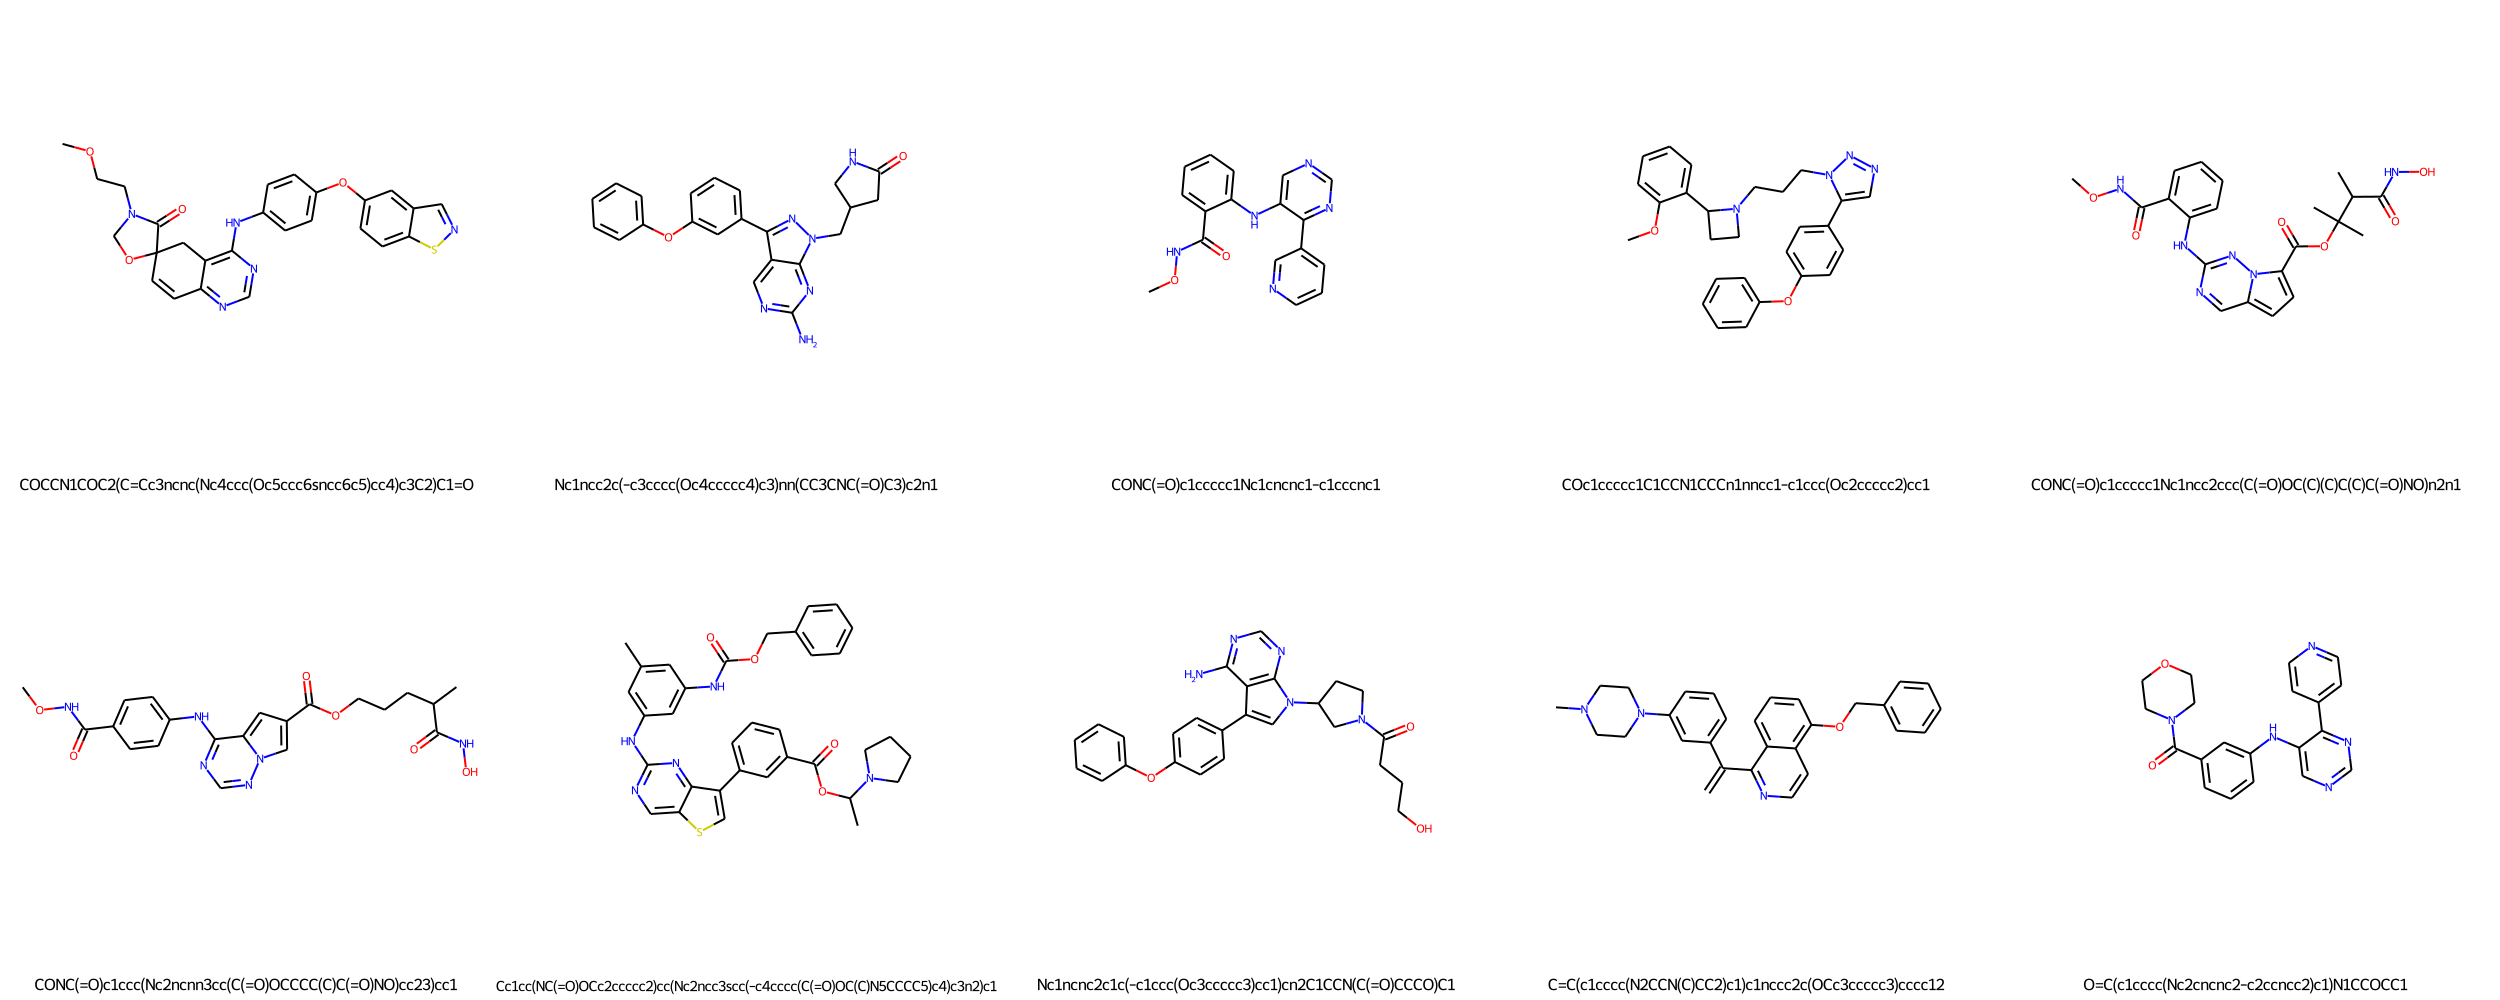

In [15]:
Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(out['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(out['SMILES'])[:10])

## Latent space

In [62]:
from fast_molvae.sample import load_model
model = load_model('./data/erbb1_vocab.txt', './fast_molvae/erbb1_mvae_model/model.epoch-19')

In [63]:
z = torch.randn(1, 56//2).cuda() # a random tensor of size (1, latent_size / 2)

In [64]:
print('Random Smile: ', model.decode(z, z, False))

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7


/home/zhang/anaconda3/envs/rxtree1/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/zhang/anaconda3/envs/rxtree1/lib/python3.8/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
Random Smile:  COCCn1c(=O)oc2cc3ncnc(Nc4ccc(Oc5ccc6sncc6c5)cc4)c3cc21


In [65]:
import matplotlib.pyplot as plt

In [66]:
x = [i for _ in range(7) for i in range(-3, 4)]
y = [i for i in range(-3, 4) for _ in range(7)]
label_float = [(z[0][0].item()*(1 + xs*2), z[0][1].item()*(1 + ys*2)) for xs, ys in zip(reversed(x), reversed(y))]
# label = ['%.3f'%(xs)+','+ '%.3f'%(ys) for xs, ys in label_float]#zip(reversed(x), reversed(y))]
z_labels = [z.detach().clone() for _ in range(len(x))]

# Minor changes in the Tensor z to sample new molecules
for i, (xs, ys) in enumerate(label_float):
    z_labels[i][0][0] = xs
    z_labels[i][0][1] = ys

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 0
step: 1
step: 2
step: 3

step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step

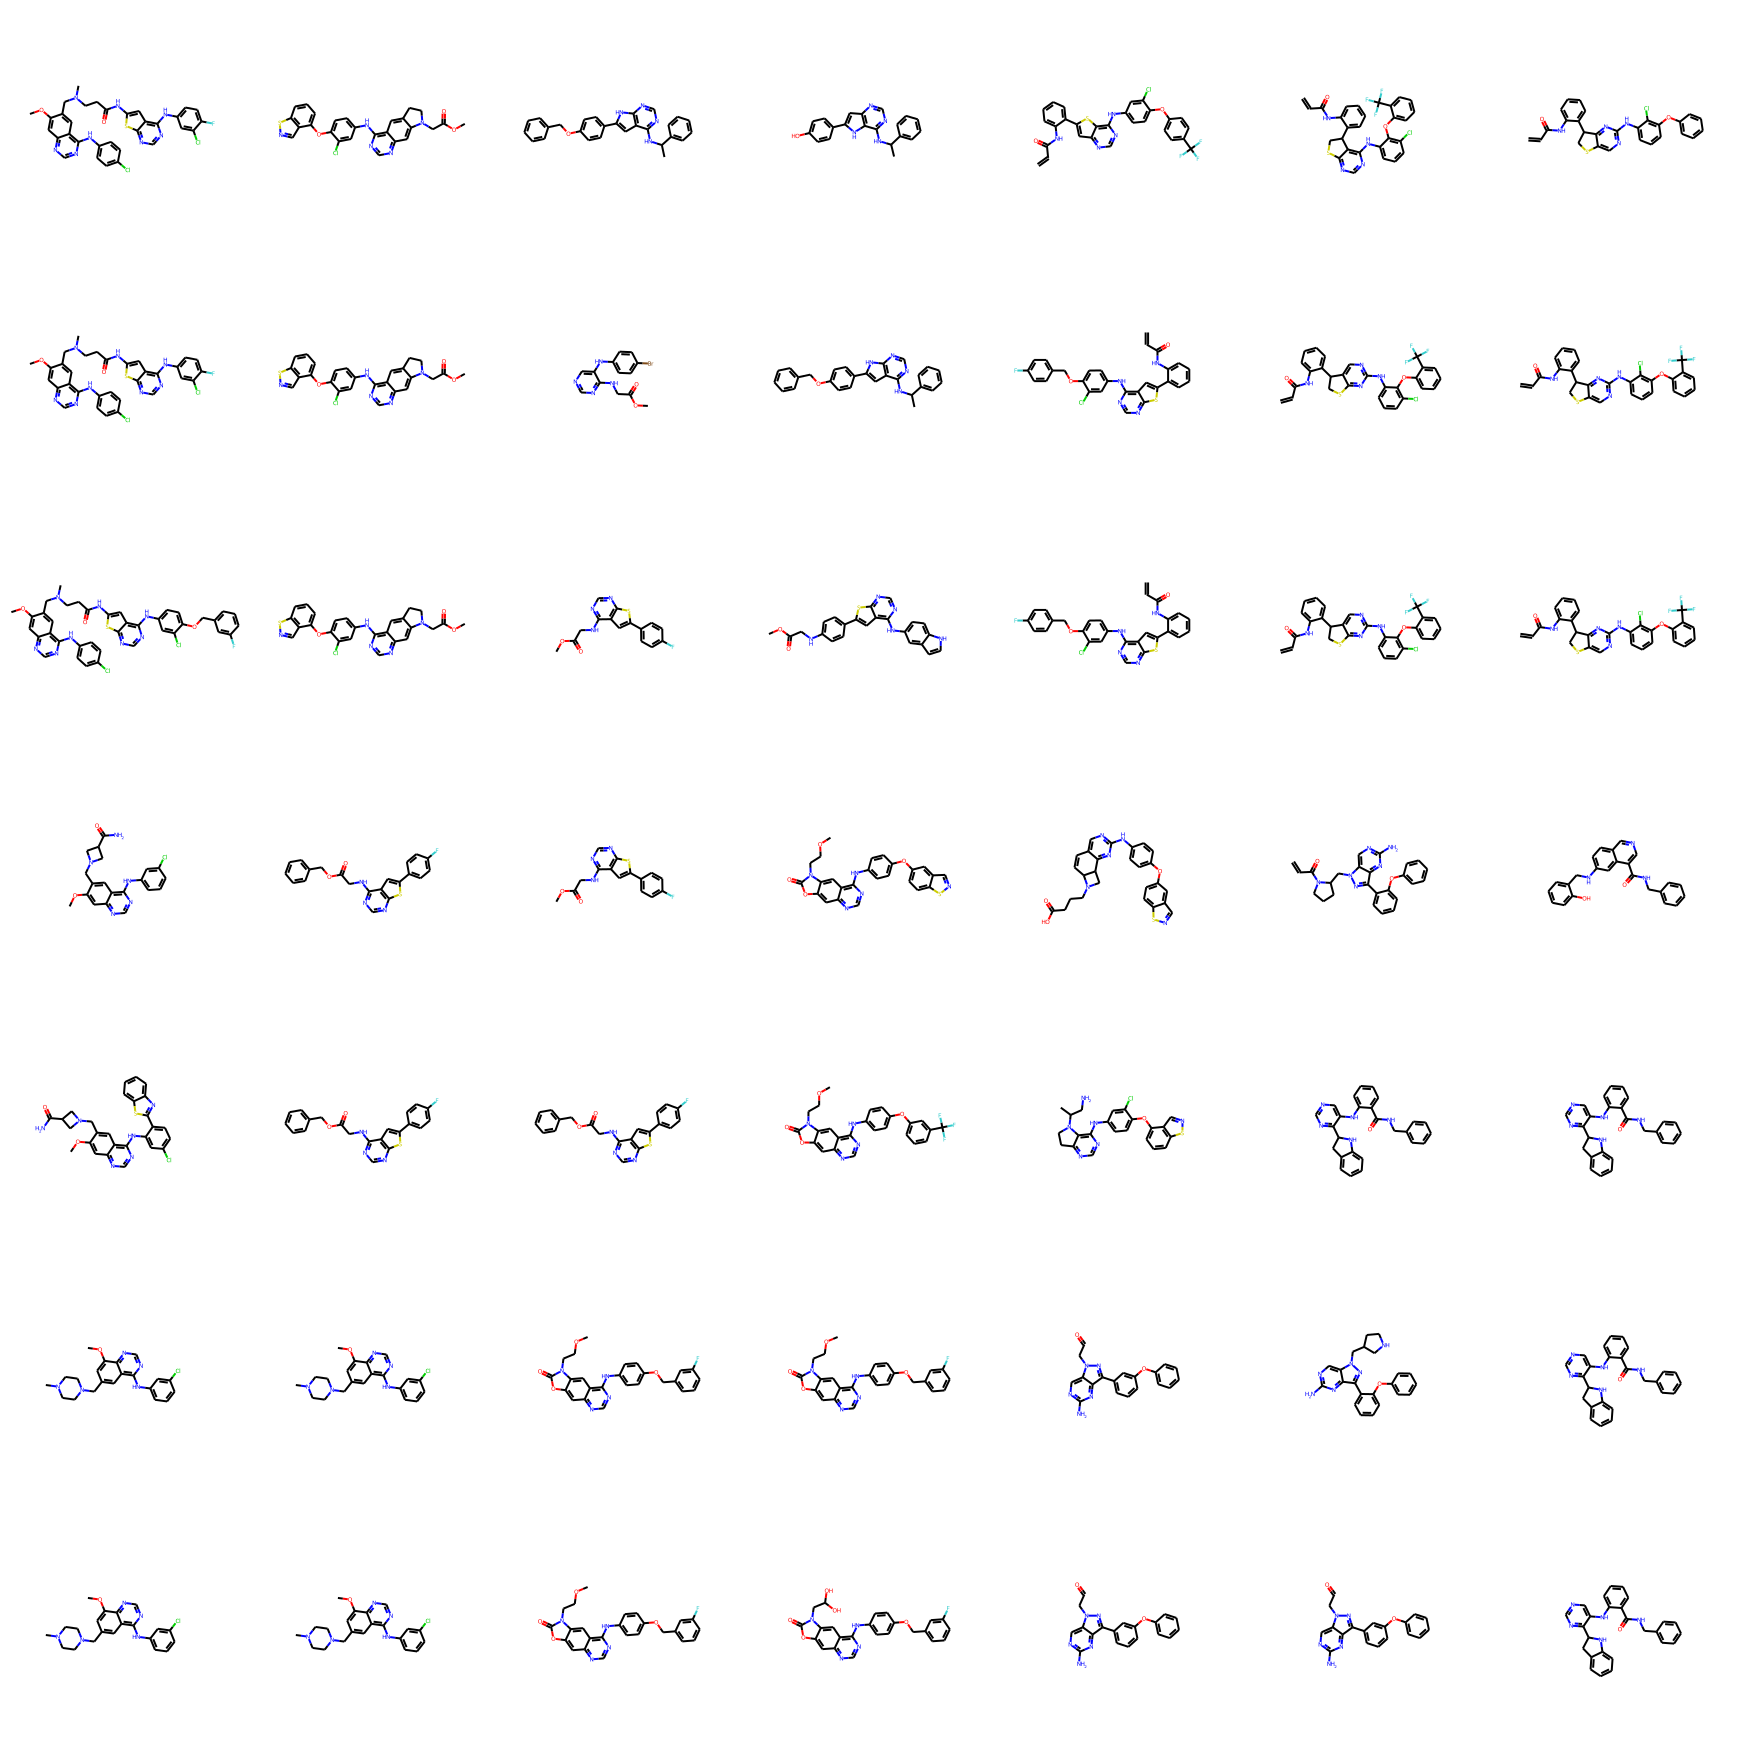

In [67]:
smiles = []
for zs in z_labels:
    smiles.append(model.decode(zs, zs, False))
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=7,subImgSize=(250,250))
img

## Bayesian Optimization
For scoring we used a summation of three properties of molecules: SA ; logP ; cycle length

### Score and Latent feature generation step

In [11]:
%load_ext autoreload
%autoreload 2

In [78]:
from fast_bo.gen_latent import main_gen_latent
main_gen_latent('./data/erbb1_ligand.csv', './data/erbb1_vocab.txt', './fast_molvae/erbb1_mvae_model/model.epoch-19', output_path='./fast_bo/descriptors/',)

load atom
load bond
load fp
load edge


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:00<00:00,  1.20it/s]


Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(C(F)(F)F)cc1 | 3.0629692
Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc2ccccc12 | 0.30196658
Br.CC[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccccc1 | 0.81657195
Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(Br)cc1 | 5.363911
Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(F)cc1 | 1.4187694
Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc(F)c1 | 1.3360574
Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccccc1 | 0.9002021
Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccccc1F | 1.6067842
Br.Cc1ccc([C@@H](C)Nc2ncnc3[nH]c(-c4ccc(O)cc4)cc23)cc1 | 0.61794484
Br.Cc1cccc(C(C)Nc2ncnc3[nH]c(-c4ccc(O)cc4)cc23)c1 | 0.67577994
Br.Cc1ccccc1C(C)Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12 | 1.221329
Br.Oc1ccc(-c2cc3c(NCc4ccc(F)cc4)ncnc3[nH]2)cc1 | 1.9665365
Br.Oc1ccc(-c2cc3c(NCc4cccc(F)c4)ncnc3[nH]2)cc1 | 1.7394551
Br.Oc1ccc(-c2cc3c(NCc4ccccc4)ncnc3[nH]2)cc1 | 2.1084704
Br.Oc1ccc(-c2cc3c(NCc4ccccc4F)ncnc3[nH]2)cc1 | 1.9588608
Brc1cc2c(NCc3ccccc3)ncnc2s1 | 7.425962
Brc1cc2c(

C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(C(=O)/C=C/CN2CCOCC2)CCCO4)c1 | 8.417238
C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(CCCN2CCCCC2)C(=O)CO4)c1 | 6.2797537
C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(CCCN2CCOCC2)C(=O)CO4)c1 | 5.431741
C#Cc1cccc(Nc2ncnc3cc4c(cc23)OCCOCCOCCO4)c1 | 2.6470213
C#Cc1cccc(Nc2ncnc3cc4oc(=O)n(CCCC(=O)OCC)c4cc23)c1 | 6.062061
C#Cc1cccc(Nc2ncnc3cc4oc(=O)n(CCCN5CCOCC5)c4cc23)c1 | 5.6542263
C#Cc1cccc(Nc2ncnc3cc4oc(=O)n(CCOC(=O)CBr)c4cc23)c1 | 6.165829
C#Cc1cccc(Nc2ncnc3cc4oc(=O)n(CCOC)c4cc23)c1 | 5.399446
C#Cc1cccc(Nc2ncnc3ccc(-c4ccc(CNCCS(C)(=O)=O)o4)cc23)c1 | 3.0024185
C#Cc1cccc(Nc2ncnc3ccc(-c4ccc(CO)o4)cc23)c1 | 2.9204426
C#Cc1cccc(Nc2ncnc3ccc(-c4cnn(C)c4)cc23)c1 | 1.3516843
C#Cc1cccc(Nc2ncnc3ccc(OCCCC(=O)NO)cc23)c1 | 4.283888
C#Cc1cccc(Nc2ncnc3ccc(OCCCCCC(=O)NO)cc23)c1 | 3.9090872
C#Cc1cccc(Nc2ncnc3ccc(OCCCCCCC(=O)NO)cc23)c1 | 3.8039694
C#Cc1cccc(Nc2ncnc3ccc(OCCCCNCCS(C)(=O)=O)cc23)c1 | 3.5119467
C#Cc1cccc(Nc2ncnc3ccc(OCCCCOP(N)(=O)N(CCCl)CCCl)cc23)c1 | 2.7012033
C#Cc1cccc(Nc2ncnc3ccc(OCCCOP(N)

C=CC(=O)N1CCC[C@@H](n2nc(C#CCC3CCCC3)c3c(N)ncnc32)C1 | 6.4443765
C=CC(=O)N1CCC[C@@H](n2nc(C3CC3)c3c(N)ncnc32)C1 | 6.8784647
C=CC(=O)N1CCC[C@@H](n2nc(Cc3ccccc3)c3c(N)ncnc32)C1 | 4.3025193
C=CC(=O)N1CCC[C@@H](n2nc(I)c3c(N)ncnc32)C1 | 3.9512653
C=CC(=O)N1CCC[C@@H](n2ncc3c(N)ncnc32)C1 | 6.9716825
C=CC(=O)N1CCC[C@@H]1COc1nc(Nc2ccc(N3CCN(C(C)=O)CC3)cc2)nc2[nH]cc(-c3cncc(NC)n3)c12 | 6.2215643
C=CC(=O)N1CCC[C@@H]1CSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3ccccc3)c2)[nH]1 | 1.7249943
C=CC(=O)N1CCC[C@@H]1Cn1nc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21 | 4.100041
C=CC(=O)N1CCC[C@H](N2C(=O)N(Cc3ccccc3)Cc3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)C1 | 5.0861964
C=CC(=O)N1CCC[C@H](Nc2ncnc(N)c2-c2ccc(Oc3ccccc3)cc2)C1 | 4.563896
C=CC(=O)N1CCC[C@H]1C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3F)ncnc2cc1OCCOC | 1.499393
C=CC(=O)N1CCC[C@H]1C(=O)Nc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1OCCOC | 1.8564225
C=CC(=O)N1CCC[C@H]1COc1nc(Nc2ccc(N3CCN(C(C)=O)CC3)cc2)nc2[nH]cc(-c3cncc(NC)n3)c12 | 6.2215643
C=CC(=O)N1CCC[C@H]1CSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3ccccc3)c2

C=CC(=O)N[C@H]1CC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)CC1 | 3.6412349
C=CC(=O)N[C@H]1CC[C@H](n2c(NC(=O)c3cccc(C(F)(F)F)c3)nc3cc(C)ccc32)CC1 | 9.500963
C=CC(=O)N[C@H]1CC[C@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)CC1 | 3.6412349
C=CC(=O)N[C@H]1CN(c2nc(Nc3cnn(C)c3)c3ncn(C(C)C)c3n2)C[C@@H]1F | 4.72058
C=CC(=O)N[C@H]1COC[C@H]1Nc1ncc(OCc2c(F)c(OC)cc(OC)c2F)cn1 | 9.079536
C=CC(=O)Nc1cc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)cc(C(C)(C)C)c1 | 2.474269
C=CC(=O)Nc1cc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)ccc1C | 2.5839043
C=CC(=O)Nc1cc(C(C)C)cc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 2.3342657
C=CC(=O)Nc1cc(Nc2cc(-c3[nH]c(SC)nc3-c3ccc(F)cc3)ccn2)cc(N2CCN(C)CC2)c1 | 0.9564939
C=CC(=O)Nc1cc(Nc2cc(-c3[nH]c(SC)nc3-c3ccc(F)cc3)ccn2)cc(N2CCOCC2)c1 | 1.2759569
C=CC(=O)Nc1cc(Nc2cc(-c3cccc(NC(=O)c4cc5c(s4)CCCC5)c3C)cn(C)c2=O)ccc1C(=O)N1CCOCC1 | 8.059727
C=CC(=O)Nc1cc(Nc2cc(-c3cccc(NC(=O)c4ccc(C(C)(C)C)cc4)c3C)cn(C)c2=O)ccc1C(=O)N1CCOCC1 | 6.8778973
C=CC(=O)Nc1

C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Br)cc3F)ncnc2cc1OCCNC(C)=O | 3.7075686
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Br)cc3F)ncnc2cc1OCCNCC(C)=O | 3.391593
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3Cl)ncnc2cc1OCCNC(C)=O | 2.9151335
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCCN(C)C | 4.044703
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCCNC(=O)CN(C)C | 3.8463635
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCCNC(=O)COC | 3.65843
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCCNC(=O)CS(C)(=O)=O | 3.7905645
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCCNC(C)=O | 3.4594193
C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCCNCC(C)=O | 3.02319
C=CC(=O)Nc1cc2c(Nc3cc(F)c(Br)cc3F)ncnc2cc1OCCNC(C)=O | 4.4885416
C=CC(=O)Nc1cc2c(Nc3cc(OC)c(Cl)cc3Cl)ncnc2cc1OCCNC(C)=O | 4.5498767
C=CC(=O)Nc1cc2c(Nc3cc(OC)c(Cl)cc3F)ncnc2cc1OCCNC(C)=O | 4.4499846
C=CC(=O)Nc1cc2c(Nc3cc(OC)c(Cl)cc3OC)ncnc2cc1OCCNC(=O)CN(C)C | 4.5602064
C=CC(=O)Nc1cc2c(Nc3cc(OC)c(Cl)cc3OC)ncnc2cc1OCCNC(C)=O | 4.3737893
C=CC(=O)Nc1cc2c(Nc3ccc(Br)c(Cl)c3)ncnc2cc1OCCNC(=O)CN(C)C

C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1 | 3.4148932
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cn1 | -0.09766886
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1 | 3.5728436
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(F)c3F)ncnc2cc1OCC1CCN(C(C)=O)CC1 | 2.4467092
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(F)c3F)ncnc2cc1OCCNC(C)=O | 3.031764
C=CC(=O)Nc1cc2c(Nc3ccc(F)cc3F)ncnc2cc1OCCNC(=O)CN(C)C | 3.2968397
C=CC(=O)Nc1cc2c(Nc3ccc(NC(=O)C=C)c(C(F)(F)F)c3)ncnc2cc1OCCOC | 3.2468138
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncnc2cc1OCCOC | 3.4244204
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1 | 6.208132
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4cccc(F)c4)cc3)ncnc2cc1O[C@H]1CCOC1 | 4.7451344
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c(C#N)cnc2cc1OCC | 4.1881022
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1 | 5.050692
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)cc3)ncnc2cc1O[C@H]1CCOC1 | 4.263757
C=CC(=O)Nc1cc2c(Nc3ccc(OCc4cccnc4)c(Cl)c3)ncnc2cc1OCCNC(C)=O | 4.84499
C=CC(=O)Nc1cc2c(Nc3cccc(Br)c3)ncnc2cc1OCCCC

C=CC(=O)Nc1cccc(N2C(=O)C(Cc3ccc(OC)cc3)N(C)C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 3.0061493
C=CC(=O)Nc1cccc(N2C(=O)C(Cc3ccccc3)N(C)C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 2.5298696
C=CC(=O)Nc1cccc(N2C(=O)C(c3ccccc3)N(C)C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 2.145022
C=CC(=O)Nc1cccc(N2C(=O)C3CCCCN3C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 3.2317529
C=CC(=O)Nc1cccc(N2C(=O)CN(C)C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 2.7878356
C=CC(=O)Nc1cccc(N2C(=O)CN(Cc3ccccc3)C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 1.6901693
C=CC(=O)Nc1cccc(N2C(=O)CN(c3ccccc3)C(=O)c3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 1.5306696
C=CC(=O)Nc1cccc(N2C(=O)N(C(C)C)Cc3cnc(Nc4ccc(N5CCN(C)CC5)cc4OC)nc32)c1 | 1.6471106
C=CC(=O)Nc1cccc(N2C(=O)N(C)Cc3cnc(NC)nc32)c1 | 6.55107
C=CC(=O)Nc1cccc(N2C(=O)N(C)Cc3cnc(Nc4ccc(N(C)C)cc4OC)nc32)c1 | 1.9661293
C=CC(=O)Nc1cccc(N2C(=O)N(C)Cc3cnc(Nc4ccc(N5CCC(N(C)C)CC5)cc4OC)nc32)c1 | 1.718365
C=CC(=O)Nc1cccc(N2C(=O)N(C)Cc3cnc(Nc4ccc(N5CCCCC5)cc4OC)nc32)c1 | 

C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)NCC(C)Oc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 3.6894622
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)NCCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 4.123662
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)NCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 4.0550146
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)OCC#CCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 3.8133135
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)OCCCCCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 3.9537177
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)OCCCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 4.215071
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)OCCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 4.1837387
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)OCCOCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c1 | 3.7914667
C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(CC(=O)OCCOc5no[n+]([O-])c5S(=O)(=O)c5ccccc5)CC4)cc3OC)ncc2Cl)c

CC(=O)N1N=C(c2ccc(I)cc2)CC1c1ccc(C(=O)OCCn2c([N+](=O)[O-])cnc2C)cc1 | 7.7575655
CC(=O)N1N=C(c2ccc([N+](=O)[O-])cc2)CC1c1ccc(C(=O)OC(C)Cn2c([N+](=O)[O-])cnc2C)cc1 | 9.455158
CC(=O)N1N=C(c2ccc([N+](=O)[O-])cc2)CC1c1ccc(C(=O)OCCn2c([N+](=O)[O-])cnc2C)cc1 | 8.739623
CC(=O)N1N=C(c2ccccc2)CC1c1ccc(C(=O)OC(C)Cn2c([N+](=O)[O-])cnc2C)cc1 | 9.283284
CC(=O)N1N=C(c2ccccc2)CC1c1ccc(C(=O)OCCn2c([N+](=O)[O-])cnc2C)cc1 | 8.632464
CC(=O)NC(Cc1c(SSc2[nH]c3ccccc3c2CC(NC(C)=O)C(=O)NCc2ccccc2)[nH]c2ccccc12)C(=O)NCc1ccccc1 | 10.515737
CC(=O)NC1CCN(Cc2ccn3ncnc(Nc4ccc5c(cnn5Cc5cccc(F)c5)c4)c23)CC1 | 5.0128374
CC(=O)NC1CCN(c2cc3c(NC(C)c4ccc(-c5ccccc5CN(C)C)s4)nc(C)nc3cn2)C1 | 10.214669
CC(=O)NCCNCc1ccc(-c2cc3nccc(Nc4ccc5[nH]ccc5c4)c3s2)cc1 | 2.5797033
CC(=O)NCCNCc1ccc(-c2cc3ncnc(Nc4ccc5[nH]ccc5c4)c3s2)cc1 | 2.8650904
CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl)c3)c21 | 2.1590197
CC(=O)NC[C@H]1CC[C@H](c2nc(-c3cc4ccccc4[nH]3)c3c(N)nccn32)CC1 | 9.315198
CC(=O)NCc1cccc(C#Cc2cncnc2Nc2ccc(OCc3cccc(F)c3)c(Cl)c2)c1

CC(C)(C)c1ccc(OC[C@@H](Cn2ccnc2[N+](=O)[O-])OC(=O)c2ccc(NC=C3C(=O)C=CC3=O)cc2)cc1 | 9.801438
CC(C)(C)c1ccc(OC[C@H](Cn2ccnc2[N+](=O)[O-])OC(=O)c2ccc(NC=C3C(=O)C=CC3=O)cc2)cc1 | 9.801438
CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1 | 9.881015
CC(C)(C)c1cnc(CSc2cnc(NC(=O)Cc3ccc(CNC(CO)CO)cc3)s2)o1 | 10.895051
CC(C)(C)n1nc(-c2ccc(Cl)cc2)c2c(N)ncnc21 | 8.090664
CC(C)(CN1CCOCC1)NC/C=C/C(=O)N1CCc2c(sc3ncnc(Nc4ccc(F)c(Cl)c4)c23)C1 | 1.1775563
CC(C)(CO)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl)c3)c21 | 1.2282437
CC(C)(CO)NCc1ccc(-c2cc3ncnc(Nc4ccc5[nH]ccc5c4)c3s2)cc1 | 2.1953104
CC(C)(N)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl)c3)c21 | 0.39462227
CC(C)(N)c1cc(C(=O)N[C@@H]2CCc3ccc(Oc4ccnc5c4CCC(=O)N5)cc3C2)cc(C(F)(F)F)c1 | 6.7245255
CC(C)(Nc1nc(NO)nc(Nc2ccc3ncsc3c2)n1)c1ccccc1 | 9.737507
CC(C)(Nc1nc(O)nc(Nc2ccc3ncsc3c2)n1)c1ccccc1 | 12.439047
CC(C)(O)C#Cc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1 | 4.0891466
CC(C)(O)C(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl)c3)c21.CS(=O)(=O)O | 2.8658428
CC(C)(O)

CC(C)n1nc(-c2ccc(Cl)c(O)c2)c2c(N)ncnc21 | 7.4627414
CC(C)n1nc(-c2ccc(F)c(C#N)c2)c2c(N)ncnc21 | 9.039733
CC(C)n1nc(-c2ccc(F)c(O)c2)c2c(N)ncnc21 | 8.148517
CC(C)n1nc(-c2ccc(N)c(O)c2)c2c(N)ncnc21 | 7.602065
CC(C)n1nc(-c2ccc(NS(C)(=O)=O)cc2)c2c(N)ncnc21 | 9.847176
CC(C)n1nc(-c2ccc(O)c(F)c2)c2c(N)ncnc21 | 8.579492
CC(C)n1nc(-c2ccc(O)cc2)c2c(N)ncnc21 | 7.7394943
CC(C)n1nc(-c2ccc(S(N)(=O)=O)cc2)c2c(N)ncnc21 | 9.516468
CC(C)n1nc(-c2ccc3[nH]c(=O)[nH]c3c2)c2c(N)ncnc21 | 8.66164
CC(C)n1nc(-c2ccc3[nH]c(=O)ccc3c2)c2c(N)ncnc21 | 8.761564
CC(C)n1nc(-c2ccc3[nH]ccc3c2)c2c(N)ncnc21 | 6.879701
CC(C)n1nc(-c2ccc3[nH]ncc3c2)c2c(N)ncnc21 | 7.5849996
CC(C)n1nc(-c2ccc3c(C=O)c[nH]c3c2)c2c(N)ncnc21 | 7.263876
CC(C)n1nc(-c2ccc3c(N)n[nH]c3c2)c2c(N)ncnc21 | 9.155485
CC(C)n1nc(-c2ccc3c(c2)CCO3)c2c(N)ncnc21 | 8.826479
CC(C)n1nc(-c2ccc3c(c2)OCCO3)c2c(N)ncnc21 | 9.927147
CC(C)n1nc(-c2ccc3c(ccn3C(=O)OC(C)(C)C)c2)c2c(N)ncnc21 | 6.129081
CC(C)n1nc(-c2ccc3c(ccn3C)c2)c2c(N)ncnc21 | 7.1253877
CC(C)n1nc(-c2ccc3cc(O)ccc3c2)c2c

CCC(=O)N1CC[C@H](N2C(=O)N(c3cccc(OC)c3Cl)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)C1 | 4.947378
CCC(=O)N1CC[C@H](N2C(=O)N(c3cccc(OC)c3F)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)C1 | 5.840194
CCC(=O)N1CC[C@H](N2C(=O)N(c3ccccc3C)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)C1 | 4.401166
CCC(=O)N1CC[C@H](N2C(=O)N(c3ccccc3Cl)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)C1 | 3.6795435
CCC(=O)N1CC[C@H](N2C(=O)N(c3ccccc3F)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)C1 | 4.6362586
CCC(=O)N1CC[C@H](N2C(=O)N(c3ccccc3OC)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)C1 | 5.9089727
CCC(=O)N1CCc2c(sc3ncnc(N[C@H](CO)c4ccccc4)c23)C1 | 7.1911883
CCC(=O)NCCSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3ccccc3)c2)[nH]1 | 3.5247378
CCC(=O)NN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)C4O)c3c3[nH]c4c(O)cccc4c23)C1=O | 11.619067
CCC(=O)N[C@H]1CC[C@@H](n2c(=O)c(-c3ccccc3Cl)c(C)c3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)CC1 | 3.350545
CCC(=O)N[C@H]1CC[C@H](N2C(=O)N(c3ccccc3Cl)Cc3cnc(Nc4ccc(N5CCN(C)CC5)c(C)c4)nc32)CC1 | 3.2463098
CCC(=O)Nc1cc(Nc2cc[nH]n2)nc(-c2ccccc2

CCCCOc1cc2c(Nc3ccc(NC(=O)OCC)c(C)c3)ncnc2cc1OCCN(CC)CC.Cl | 6.909887
CCCCOc1cc2c(Nc3ccc(NC(=O)OCC)c(Cl)c3)ncnc2cc1OCCN(CC)CC | 8.182498
CCCCOc1cc2c(Nc3ccc(NC(=O)OCC)c(Cl)c3)ncnc2cc1OCCN(CC)CC.Cl | 6.0804167
CCCCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCCCC | 4.5249424
CCCCc1cc(/C=C(\C#N)C(N)=O)cc(CCCC)c1O | 10.676282
CCCN(C/C=C/C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1)CCC | 4.4962687
CCCN(CC#CC(=O)Nc1ccc2ncc(C#N)c(Nc3cccc(Br)c3)c2c1)CCC | 7.2128105
CCCN(CC#CC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1)CCC | 4.3219433
CCCN(CCC)C(=O)c1ccc(N(CCCl)CCCl)cc1 | 9.441769
CCCN(CCS(C)(=O)=O)Cc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 | 3.8287392
CCCN(c1ccc(OC)cc1)c1nc(C)nc2oc(C)cc12 | 4.3120956
CCCN(c1ccc(OC)cc1)c1ncnc2occ(C)c12 | 2.2706037
CCCN1CCC(Oc2cc(OC)cc3ncnc(Nc4ccc(F)c(Cl)c4)c23)CC1 | 3.5321994
CCCN1CCC(c2cc(OC)c(Nc3nccc(-c4c(-c5ccc(OC)c(C(=O)Nc6c(F)cccc6F)c5)nc5ccccn45)n3)cc2C)CC1 | 6.2595854
CCCN1CCC(n2cc(CNc3cc(Cl)c4ncc(C#N)c(Nc5ccc(F)c(Cl)c5)c4c3)nn2)CC1 | 8.2333765
CCCN1CCCOC(COc2cc3ncnc(Nc4ccc

CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(C(C)(C)C)cc4)c3cc21 | 8.497801
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(C)cc4)c3cc21 | 8.058744
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(Cl)cc4)c3cc21 | 7.9870386
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(F)c(Cl)c4)c3cc21 | 6.5278316
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(F)c(F)c4)c3cc21 | 6.321284
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(O)cc4)c3cc21 | 7.3312607
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OC(C)C)cc4)c3cc21 | 8.893619
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OC)c(OC)c4)c3cc21 | 7.6427555
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OC)cc4)c3cc21 | 7.827304
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OCC)cc4)c3cc21 | 8.161571
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OCc5ccc(Cl)cc5)c(Cl)c4)c3cc21 | 5.668223
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OCc5ccc(OC)cc5)c(Cl)c4)c3cc21 | 6.170291
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OCc5ccccc5)c(Cl)c4)c3cc21 | 5.613053
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OCc5ccccn5)cc4)c3cc21 | 7.547788
CCOC(=O)CCCn1c(=O)oc2cc3ncnc(Nc4ccc(OCc5nccc(OCC(F)(F)F)c5C)cc4)c3cc21 |

CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCCC1 | 4.118727
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCN(C)CC1 | 3.6440315
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCOCC1 | 4.6690474
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCOCCOCCOCC1 | 4.369029
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCSCC1 | 3.3841357
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/Cc1c[nH]cn1 | 3.9267197
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/c1cccc2cccnc12 | 5.2943854
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/c1ccccc1N(C)C | 6.69719
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/c1cn(C)cn1 | 5.09764
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4)cc3)c2cc1NC(=O)/C=C/CN(C)C | 5.146179
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4Cl)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C | 4.746491
CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccc4F)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C | 4.4797435
CCOc1cc2ncc(C

CCOc1cc2ncnc(Nc3cccc(-c4cncnc4)c3)c2cc1OCC | 4.263188
CCOc1cc2ncnc(Nc3cccc(-c4cncs4)c3)c2cc1OCC | 3.5150094
CCOc1cc2ncnc(Nc3cccc(-c4cocn4)c3)c2cc1OCC | 6.164577
CCOc1cc2ncnc(Nc3cccc(-c4csc(C)n4)c3)c2cc1OCC | 5.284061
CCOc1cc2ncnc(Nc3cccc(-c4csc(N)n4)c3)c2cc1OCC | 6.5615344
CCOc1cc2ncnc(Nc3cccc(-c4cscn4)c3)c2cc1OCC | 6.090811
CCOc1cc2ncnc(Nc3cccc(-c4nc[nH]n4)c3)c2cc1OCC | 5.295793
CCOc1cc2ncnc(Nc3cccc(-c4nccs4)c3)c2cc1OCC | 3.0018988
CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC | 2.11627
CCOc1cc2ncnc(Nc3cccc(F)c3)c2cc1OCC.Cl | 4.3826694
CCOc1cc2ncnc(Nc3cccc(OC)c3)c2c2c1OCCO2 | 5.00505
CCOc1cc2ncnc(Nc3cccc([N+](=O)[O-])c3)c2c2c1OCCO2 | 3.5889597
CCOc1cc2ncnc(Nc3ccccc3F)c2cc1OCC.Cl | 4.245751
CCOc1ccc(-c2cc(C(F)(F)F)c(C#N)c(SCC(=O)NCC(=O)O)n2)cc1 | 8.863627
CCOc1ccc(-c2n[nH]c3ncnc(N)c23)cc1OC | 10.385944
CCOc1ccc(-c2nn(C(C)C)c3ncnc(N)c23)cc1OC | 7.8611856
CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1O | 5.888174
CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC | 6.8716507
CCOc1ccc(-c2nn(C3CCCCC3)c3ncnc(N)c23)c

CN(C)C/C=C/C(=O)N1CCCC1Cn1nc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21 | 5.231685
CN(C)C/C=C/C(=O)N1CCCOc2cc3ncnc(Nc4ccc(F)c(Cl)c4)c3cc21 | 6.571612
CN(C)C/C=C/C(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccc(F)cc4F)cc3)c(C(N)=O)c2N)C1 | 4.26306
CN(C)C/C=C/C(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1 | 3.7751255
CN(C)C/C=C/C(=O)N1CCC[C@@H](n2nc(-c3cccc(C(F)(F)F)c3)c3c(N)ncnc32)C1 | 5.731048
CN(C)C/C=C/C(=O)N1CCC[C@@H](n2nc(-c3ccccc3)c3c(N)ncnc32)C1 | 5.5951085
CN(C)C/C=C/C(=O)N1CCC[C@H]1Cn1nc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21 | 5.231685
CN(C)C/C=C/C(=O)N1CCOc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3cc21 | 7.9179263
CN(C)C/C=C/C(=O)N1CCc2[nH]c3c(C(N)=O)c(-c4ccc(Oc5ccccc5)cc4)nn3c2C1 | 0.10513955
CN(C)C/C=C/C(=O)N1CCc2c(sc3ncc(C#N)c(Nc4ccc(F)c(Cl)c4)c23)C1 | 2.8245635
CN(C)C/C=C/C(=O)N1CCc2c(sc3ncnc(NCCO)c23)C1 | 5.421084
CN(C)C/C=C/C(=O)N1CCc2c(sc3ncnc(N[C@@H](CO)c4ccccc4)c23)C1 | 5.0356116
CN(C)C/C=C/C(=O)N1CCc2c(sc3ncnc(N[C@H](CO)Cc4ccccc4)c23)C1 | 5.6812143
CN(C)C/C=C/C(=O)N1CCc2c(sc3ncnc(N[

CN(C)CCOc1ccc(Nc2ncc3nc(Sc4ccccc4)n(C4CCOCC4)c3n2)cc1 | 7.1651793
CN(C)CCOc1cccc(Nc2nccc(-c3c(-c4cccc(C(=O)Nc5cc(C(F)(F)F)ccc5F)c4)nc4ccccn34)n2)c1 | 8.377151
CN(C)CCc1ccc(-c2cc3ncnc(Nc4ccc5[nH]ccc5c4)c3s2)cc1 | 0.76753676
CN(C)CCc1ccc(Nc2nc3ncnc(Nc4ccc(F)c(Cl)c4)c3s2)cc1 | 2.246952
CN(C)CCc1ccc(Nc2nccc(-c3c(-c4cccc(NC(=O)c5c(F)cccc5F)c4)nc4sccn34)n2)cc1 | 3.7738228
CN(C)CCn1ccc2cc3c(Nc4cccc(Br)c4)ncnc3cc21 | 2.8687205
CN(C)CCn1cnc2c(Cl)c3c(Nc4cccc(Br)c4)ncnc3cc21 | 1.9743873
CN(C)CCn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc21 | 1.6850915
CN(C)CCn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc21 | 1.5865482
CN(C)CCn1ncc2cc3c(Nc4cccc(Br)c4)ncnc3cc21 | 1.8288518
CN(C)Cc1c[nH]c2cc3ncnc(Nc4cccc(Br)c4)c3cc12 | 1.6076759
CN(C)Cc1cc(C(=O)N[C@@H]2CCc3ccc(Oc4ccnc5c4CCC(=O)N5)cc3C2)cc(C(F)(F)F)c1 | 7.264179
CN(C)Cc1ccc(-c2cc3c(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)ncnc3s2)[nH]1 | 4.128424
CN(C)Cc1ccc(-c2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)[nH]1 | 1.854882
CN(C)Cc1ccc(-c2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)o1 | 1.19357

CN1CCN(c2ccc(Nc3ncc4nc(Nc5ccccc5)n(C5CC5)c4n3)cc2)CC1 | 1.1589978
CN1CCN(c2ccc(Nc3ncc4nc(Sc5ccccc5)n(C5CCOCC5)c4n3)cc2)CC1 | 6.7570257
CN1CCN(c2ccc(Nc3ncc4nc(Sc5ccccc5)n([C@H]5CC[C@H](O)CC5)c4n3)cc2)CC1 | 5.3185606
CN1CCN(c2ccc(Nc3ncnc4cc5oc(=O)n(CCOC(=O)CBr)c5cc34)cc2Cl)CC1 | 4.1916046
CN1CCN(c2ccc(Nc3ncnc4cc5oc(=O)n(CCOC(=O)CCl)c5cc34)cc2Cl)CC1 | 3.9877129
CN1CCN(c2ccc3c(n2)nc(-c2ccc(F)cc2)n3-c2ccnc(NC3CCCC3)n2)CC1 | 8.526839
CN1CCN(c2ccnc(Nc3ccc(-c4nc5ccccc5s4)cc3)n2)CC1 | 11.142405
CN1CCN(c2nc(C3=C(c4c[nH]c5ccccc45)C(=O)NC3=O)c3ccccc3n2)CC1 | 8.86804
CN1CCN(c2nc(Nc3ccc(F)cc3)nc3cnc(Nc4ccc(N5CCC(N(C)C)CC5)cn4)cc23)CC1 | 2.8277016
CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)[C@H](O)C1 | 7.629179
CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(Oc4ccccc4Cl)oc23)[C@H](O)C1 | 8.273977
CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(Sc4ccccc4Cl)oc23)[C@H](O)C1 | 8.871627
CN1C[C@@H]2C[C@H]1CN2c1cc(F)c(-c2ccnc3c(-c4cccc5[nH]ncc45)c(-c4ccncc4)nn23)c(F)c1 | 3.4985018
CN1Cc2cc3c(Nc4cccc(Br)c4)ncnc3cc21 | -0.16364548
CNC

COC(=O)c1cc(NCc2cc(O)ccc2O)ccc1O | 8.470948
COC(=O)c1cc(NCc2cc(O)ccc2O)ccc1OC | 8.730128
COC(=O)c1cc(NCc2ccc(O)cc2)ccc1O | 8.890199
COC(=O)c1cc(NCc2cccc(O)c2)ccc1O | 8.515389
COC(=O)c1cc(NCc2ccccc2O)ccc1O | 9.089644
COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=O)OC | 10.153215
COC(=O)c1cc(Nc2ccccc2)c(Nc2ccccc2)cc1C(=O)OC | 10.39101
COC(=O)c1cc(OC)c(-c2cc3c(N[C@H](C)c4ccccc4)ncnc3s2)c(OC)c1 | 1.5501053
COC(=O)c1cc(OCC2=CC(OC)CC=C2OC)ccc1O | 8.708349
COC(=O)c1cc2cc(NCc3cc(NC(=O)c4cc(-n5cnc(C)c5)cc(C(F)(F)F)c4)ccc3C)cnc2[nH]1 | 3.5087996
COC(=O)c1ccc(-c2cc(O)cc(C(C)(C)C)c2)cc1 | 9.444809
COC(=O)c1ccc(-c2cc3c(N[C@H](C)c4ccccc4)ncnc3s2)c(OC)c1 | 2.3743806
COC(=O)c1ccc(-c2ccc(-c3ccccc3)cc2O)cc1 | 9.713071
COC(=O)c1ccc(-c2cccc(-c3ccccc3)c2O)cc1 | 9.5634365
COC(=O)c1ccc(/N=C/c2cc(O)ccc2O)cc1O | 9.786375
COC(=O)c1ccc(C(=O)N(C)[C@H]2C[C@@H]3O[C@](C)([C@H]2OC)n2c4ccccc4c4c5c(c6c7ccccc7n3c6c42)C(=O)NC5)cc1 | 7.9876485
COC(=O)c1ccc(C(=O)c2c(SSc3c(C(=O)c4ccc(C(=O)OC)cc4)c4ccccc4n3C)n(C)c3ccccc23)cc

CO[C@H]1[C@@H](N(C)C(=O)c2cccnc2)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 7.4979663
CO[C@H]1[C@@H](N(C)C(=O)c2cnccn2)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 9.145052
CO[C@H]1[C@@H](N(C)C(C)=O)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 6.926872
CO[C@H]1[C@@H](N(C)CC(=O)O)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 5.966654
CO[C@H]1[C@@H](N(C)CCC#N)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 6.108904
CO[C@H]1[C@@H](N(C)Cc2ccccc2)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 6.4530725
CO[C@H]1[C@@H](N(C)S(C)(=O)=O)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 6.807882
CO[C@H]1[C@@H]([N+](C)(C)C)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4 | 4.608261
COc1c(Br)cc(/C=C2\C(=O)Nc3ccc(Cl)cc32)cc1C(C)(C)C | 9.706646
COc1c(Br)cc(/C=C2\C(=O)Nc3ccccc32)cc1C(C)(C)C | 9.8251915
COc1c(Br)cccc1Nc1ncnc2ccncc12 | 2.8751364
COc1c(C(=O)NCCN(C)C)cccc1-c1cc2

COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(=C/c3ccc(N(C)C)cc3)C(F)(F)F)c2)n1 | 9.509348
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/C(C)(C)C)c2)n1 | 8.74771
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/C(C)C)c2)n1 | 8.105829
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/C3CC3)c2)n1 | 6.1451163
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/C3CCCC3)c2)n1 | 5.7448096
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/c3ccc(C#N)cc3)c2)n1 | 8.839251
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/c3ccc(F)cc3)c2)n1 | 8.009668
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/c3ccc(N(C)C)cc3)c2)n1 | 9.680062
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/c3ccc(SC)cc3)c2)n1 | 9.077638
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/c3ccc([N+](=O)[O-])cc3)c2)n1 | 8.821884
COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(=O)/C(C#N)=C/c3cccc([N+](=O)[O-])c3)c2)n1 | 8.329094
COc1cc(N2CCN

COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1c(-c2c(Cl)cccc2Cl)noc1C | 5.7165723
COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1cc(Br)cc(Br)c1 | 4.391154
COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1ccc2nc(C(F)(F)F)cc(Cl)c2c1 | 3.8255296
COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1csc(-c2ccc(C(F)(F)F)cc2)n1 | 3.9072824
COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1csc(-c2ccc(Cl)cc2)n1 | 3.3166637
COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1csc2ccc(Cl)cc12 | 2.3136759
COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCc1nc(-c2ccc(C(C)(C)C)cc2)no1 | 4.674165
COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OCCOCCNC(=O)Cn1cnc([N+](=O)[O-])n1 | 1.2585734
COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OC[C@@H]1C[C@@H]2CN(C)C[C@@H]2C1 | 0.678847
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OC/C=C/CN1CCCC1.Cl | 4.837726
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl | 5.421653
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCNCC1.Cl | 4.65778
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCC1CCN(C)CC1 | 4.519696
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCCN1CCCC1.Cl | 6.642622
COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc

COc1cc2c(Oc3ccc(NC(=O)c4c(Cl)c5ccccc5n(-c5ccc(F)cc5)c4=O)cc3F)ccnc2cc1OCCCN1CCN(C)CC1 | 7.3964396
COc1cc2c(Oc3ccc(NC(=O)c4cc(-c5ccc(C)cc5)ccn4)cc3F)ccnc2cc1OCCCN1CCN(C)CC1 | 5.9653664
COc1cc2c(Oc3ccc(NC(=O)c4cc5cccnc5n(-c5ccc(F)cc5)c4=O)cc3F)ccnc2cc1OCCCN1CCN(C)CC1 | 6.855909
COc1cc2c(Oc3ccc(NC(=O)c4cn(-c5ccccc5Cl)nn4)cc3F)ccnc2cc1OCCCN1CCCCC1 | 7.5012145
COc1cc2c(Oc3ccc(NC(=O)c4cn(-c5ccccc5OC)cn4)cc3F)ccnc2cc1OCCCN1CCN(C)CC1 | 6.406587
COc1cc2c(Oc3ccc(NC(=O)c4nc5ccccc5n(-c5ccc(F)cc5)c4=O)cc3F)ccnc2cc1OCCCN1CCN(C)CC1 | 5.997896
COc1cc2c(Oc3ccc(NC(=O)c4nn(-c5ccc(F)cc5)c(=O)c5ccccc45)cc3F)ccnc2cc1OCCCN1CCCC1 | 8.250184
COc1cc2c(Oc3ccc(NC(=O)c4nn(-c5ccccc5C(F)(F)F)c(=O)cc4C)cc3F)ccnc2cc1OCCCN1CCOCC1 | 7.9245048
COc1cc2c(Oc3ccc(NC(=O)c4nn(-c5ccccc5C(F)(F)F)c5ccccc5c4=O)cc3F)ccnc2cc1OCCCN1CCCC1 | 8.116309
COc1cc2c(Oc3ccc(NC(=O)c4nn(-c5ccccc5F)c(=O)n4C)cc3F)ccnc2cc1OCCCN1CCN(C)CC1 | 9.621145
COc1cc2c(Oc3ccc(NC(=O)c4nnn(-c5ccc(F)cc5)c4C(F)(F)F)cc3F)ccnc2cc1OCCCN1CCCC1 | 8.18697
COc1cc2c(Oc3cc

COc1cc2ncc(C#N)c(Nc3cccc(N=[N+]=[N-])c3)c2cc1OC | 8.05027
COc1cc2ncc(C#N)c(Nc3cccc(NC(C)=O)c3)c2cc1OC | 8.043858
COc1cc2ncc(C#N)c(Nc3cccc(O)c3)c2cc1OC | 8.098084
COc1cc2ncc(C#N)c(Nc3cccc(SC)c3)c2cc1OC | 8.457733
COc1cc2ncc(C#N)c(Nc3cccc([N+](=O)[O-])c3)c2cc1OC | 8.323891
COc1cc2ncc(C#N)c(Nc3ccccc3Br)c2cc1OC | 7.7561226
COc1cc2ncc(C#N)c(Nc3ccccc3C(C)C)c2cc1OC | 7.86816
COc1cc2ncc(C(=O)NC3CC(C)(C)N([O])C(C)(C)C3)c(Nc3ccc(F)c(Cl)c3)c2cc1OC | 6.048137
COc1cc2ncc(C(=O)NC3CC(C)(C)N([O])C(C)(C)C3)c(Nc3cccc(Br)c3)c2cc1OC | 6.524283
COc1cc2ncc(C(=O)NC3CC(C)(C)N([O])C(C)(C)C3)c(Nc3cccc(Cl)c3)c2cc1OC | 6.216755
COc1cc2ncc(C(=O)O)c(Nc3ccc(F)c(Cl)c3)c2cc1OC | 8.063805
COc1cc2ncc(C(=O)O)c(Nc3cccc(Br)c3)c2cc1OC | 8.536609
COc1cc2ncc(C(=O)O)c(Nc3cccc(Cl)c3)c2cc1OC | 8.3233185
COc1cc2ncc(C(N)=O)c(Nc3cccc(Br)c3)c2cc1OC | 7.7217793
COc1cc2ncc(C=O)c(Nc3cccc(Br)c3)c2cc1OC | 7.238798
COc1cc2ncc(N[C@H]3CC[C@H](O)CC3)nc2cc1OC | 9.698696
COc1cc2nccc(Nc3cc(OC)c(OC)c(OC)c3)c2cc1OC | 8.79904
COc1cc2nccc(Nc3ccc(F)

COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCn1c([N+](=O)[O-])cnc1C | 0.28918105
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCn1ccnc1[N+](=O)[O-] | 0.013840139
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN(C)C | 3.2706618
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN(CCO)CCO | 3.3817868
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CC(O)C1 | 1.7307203
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CC(OC)C1 | 3.5211134
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CC2(C1)CS(=O)(=O)C2 | 3.3948145
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CC2(CCO2)C1 | 4.639864
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CC2(COC2)C1 | 3.492834
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CC2(CSC2)C1 | 3.6256633
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCCC1 | 3.3800879
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCCCC1 | 3.290782
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCN(C)CC1 | 3.6509147
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCOCC1 | 3.8682218
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCNC(C)(C)C | 5.471314
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCNC(C)(CO)CO | 3.8538651
COc1cc2ncnc

COc1ccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]c3c(c2CCC(=O)O)CCCC3)cc1 | 10.483462
COc1ccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]cc(CCC(=O)O)c2C)cc1 | 10.457628
COc1ccc(-c2ccc3c(c2)NC(=O)/C3=C\c2cc3c([nH]2)CCCC3)cc1 | 11.600274
COc1ccc(-c2cn(-c3ccccc3)c3ncnc(N)c23)cc1 | 7.2954574
COc1ccc(-c2cn(C3CCCC3)c3ncnc(N)c23)cc1 | 6.8259387
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)c(OC)c1 | 10.030901
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)cc1 | 9.286027
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)cc1C | 9.70926
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)cc1F | 10.028759
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)cc1OC | 10.01449
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)cn1 | 9.494688
COc1ccc(-c2cnc3cc(OC)c(OC)cc3c2)s1 | 9.285791
COc1ccc(-c2cncc(C#N)c2Nc2ccc3[nH]ccc3c2)cc1OC | 9.050308
COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1 | 9.334517
COc1ccc(-c2n[nH]c3ncnc(N)c23)cc1O | 10.195495
COc1ccc(-c2nc3sc(-c4ccc(Cl)cc4)cn3n2)cc1 | 7.587278
COc1ccc(-c2nc3sc(-c4ccccc4)cn3n2)cc1 | 8.135715
COc1ccc(-c2nn(C(C)(C)C)c3ncnc(N)c23)cc1OC | 7.7491016
COc1ccc(-c2nn(C(C)C)c3ncnc(N)c23)cc1 | 7.67

COc1ccc(Nc2nc(C)nc3c(Cc4ccccc4)cn(C)c23)cc1.Cl | 5.4688263
COc1ccc(Nc2nc(C)nc3oc(C)cc23)cc1 | 4.472667
COc1ccc(Nc2nc(Cl)nc(NCc3ccco3)n2)cc1 | 11.161471
COc1ccc(Nc2nc3cnc(Nc4ccc(N5CCN(C)CC5)cc4)nc3n2C(C)C)cc1 | 3.0998363
COc1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2SC3)cc1 | 9.352313
COc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n2)cc1 | 5.30874
COc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n2)cc1C | 5.001983
COc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n2)cn1 | 6.8046575
COc1ccc(Nc2ncc3ncc(=O)n(-c4ccc(NC(=O)/C=C/CN(C)C)cc4)c3n2)cc1 | 7.7270684
COc1ccc(Nc2ncc3ncc(=O)n(-c4cccc(N)c4)c3n2)cc1 | 8.575245
COc1ccc(Nc2ncc3ncc(=O)n(-c4cccc(NC(=O)/C=C/CN(C)C)c4)c3n2)cc1 | 6.053906
COc1ccc(Nc2ncnc3cc(N)ncc23)cc1 | 7.162085
COc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1.Cl | 4.9302287
COc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1OC | 6.790058
COc1ccc(Nc2ncnc3cc(OC)c(OC)cc23)cc1OC.Cl | 5.504084
COc1ccc(Nc2ncnc3cc4oc(=O)n(CCCN5CCOCC5)c4cc23)cc1 | 8.289811
COc1ccc(Nc2ncnc3cccc(OC4CCN(C)CC4)c23)cc1Cl | 4.1716833
COc1ccc(Nc2ncnc3ccncc23

COc1ccccc1/C(C)=C\c1coc2nc(N)nc(N)c12 | 11.276535
COc1ccccc1/C=C/C(=N/NC(N)=S)c1ccccc1 | 8.218143
COc1ccccc1/C=C/C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 7.1303134
COc1ccccc1/C=C/C(=O)OCCn1c([N+](=O)[O-])cnc1C | 9.111236
COc1ccccc1C(=Cc1coc2nc(=N)[nH]c(N)c12)C(C)C | 11.958417
COc1ccccc1C(=Cc1coc2nc(=N)[nH]c(N)c12)C1CC1 | 10.956936
COc1ccccc1C(=Cc1coc2nc(=N)[nH]c(N)c12)CC(C)C | 11.551248
COc1ccccc1C(=O)Nc1ccc(C)c(Nc2nccc(-c3cccnc3)n2)c1 | 10.972636
COc1ccccc1C(=O)Nc1cccc(Nc2nccc(-c3cccnc3)n2)c1 | 10.828613
COc1ccccc1C(Cc1coc2nc(N)nc(N)c12)C(C)C | 10.506167
COc1ccccc1C(Cc1coc2nc(N)nc(N)c12)C1CC1 | 10.190044
COc1ccccc1C(Cc1coc2nc(N)nc(N)c12)CC(C)C | 10.5823145
COc1ccccc1CNc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 8.155614
COc1ccccc1CNc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 8.564413
COc1ccccc1CNc1ncc(C(=O)NC2CCN(C)CC2)c(NC2CCCC2)n1 | 9.943673
COc1ccccc1CNc1ncc(C(=O)NCCCN2CCCC2=O)c(NC2CCCC2)n1 | 10.305546
COc1ccccc1CNc1ncnc2cc(N)ncc12 | 9.334938
COc1ccccc1CO/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1 | 3.31561

CSc1c(C(=O)Nc2ccccc2)c2ccccc2n1C | 10.403508
CSc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1 | 10.296275
CSc1ccc(/C=C2/C(C)=C(CC(=O)O)c3cc(F)ccc32)cc1 | 7.8674045
CSc1ccc(/C=C2\C(=O)Nc3cccc(C)c32)s1 | 11.084585
CSc1ccc(/C=C2\C(=O)Nc3ccccc32)s1 | 11.371228
CSc1ccc(C=C(C#N)C#N)cc1 | 12.66067
CSc1ccc(CCCCCn2cc(CCN)c3cc(OCCc4ccc(O)cc4)ccc32)cc1.Cl | 7.4976625
CSc1ccc(CCCCCn2cc(CCNC(=O)OC(C)(C)C)c3cc(OCCc4ccc(O)cc4)ccc32)cc1 | 10.218276
CSc1ccc(N(C)c2ncnc3occ(C)c23)cc1 | 2.4698648
CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2 | 9.8147745
CSc1ccccc1Nc1nc(N2CCNCC2)nc2c(NCC3CC3)ncnc12 | 7.904201
CSc1cn2c(-c3cn[nH]c3)cnc2c(Nc2cc(C)ns2)n1 | 9.649778
CSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3cc(F)cc([N+](=O)[O-])c3)c2)[nH]1 | 3.5221653
CSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3cc(N4CCN(C)CC4)cc([N+](=O)[O-])c3)c2)[nH]1 | 3.2731748
CSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3ccccc3)c2)[nH]1 | 3.1459923
C[C@@H](CN(C)C(=O)CO)Oc1cccc2ncnc(Nc3ccc(OCc4ccccn4)c(Cl)c3)c12 | 3.920566
C[C@@H](CN)n1nc(-c2ccc(Cl)c(O)c2)c2c(N)ncnc21 | 8.52793
C[C@@H](

Cc1c[nH]c(/C=C2\C(=O)Nc3ccccc32)c1C | 11.644679
Cc1c[nH]c(/C=C2\C(=O)Nc3ccccc32)c1CCC(=O)O | 11.327854
Cc1c[nH]c2ccc(Nc3ncnc4cc(-c5ccccc5)sc34)cc12 | 1.8995793
Cc1cc(-c2cnc(Nc3cc(Cl)cc(Cl)c3)nc2NC2CCC(N(C)C)CC2)on1 | 7.194806
Cc1cc(-c2nn(C(C)C)c3ncnc(N)c23)sc1C=O | 9.046448
Cc1cc(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]c1C(=O)N1CCN(C)CC1 | 3.546844
Cc1cc(/C=N/NC(=O)Nc2ccc(-c3nc(N4CCOCC4)c4sccc4n3)cc2)cc(C)c1O | 10.564892
Cc1cc(=O)n(-c2ccc(F)cc2)nc1C(=O)Nc1ccc(Oc2ccnc3[nH]ccc23)c(F)c1 | 7.3462954
Cc1cc(=O)n(-c2ccc(F)cc2)nc1C(=O)Nc1ccc(Oc2ncnc3ccsc23)c(F)c1 | 7.7993164
Cc1cc(=O)n2nc(SCc3ccc(C(C)(C)C)cc3)nc2[nH]1 | 4.9284277
Cc1cc(=O)n2nc(SCc3ccc(C(C)C)cc3)nc2[nH]1 | 4.086608
Cc1cc(=O)n2nc(SCc3ccc(Cl)cc3)nc2[nH]1 | 4.419936
Cc1cc(=O)n2nc(SCc3ccc(Cl)cc3Cl)nc2[nH]1 | 4.795713
Cc1cc(=O)n2nc(SCc3ccc(F)cc3)nc2[nH]1 | 3.707065
Cc1cc(=O)n2nc(SCc3ccc([N+](=O)[O-])cc3)nc2[nH]1 | 4.5422482
Cc1cc(=O)n2nc(SCc3cccc(C(F)(F)F)c3)nc2[nH]1 | 4.7341976
Cc1cc(=O)n2nc(SCc3cccc(Cl)c3)nc2[nH]1 | 4.2624545


Cc1ccc(C2=NN(c3nc(-c4ccccc4)cs3)C(c3ccc(F)cc3)C2)cc1C | 7.5094833
Cc1ccc(C2=NN(c3nc(-c4ccccc4)cs3)C(c3ccc(O)cc3)C2)cc1C | 7.362205
Cc1ccc(C2=NN(c3nc(-c4ccccc4)cs3)C(c3ccc([N+](=O)[O-])cc3)C2)cc1C | 7.7090054
Cc1ccc(C2CC(c3ccc(Br)c(Br)c3)=NN2C(N)=S)cc1 | 8.172437
Cc1ccc(C2CC(c3ccc(Br)cc3)=NN2C2=NC(=O)CS2)cc1 | 7.919686
Cc1ccc(C2CC(c3ccc(Br)cc3)=NN2c2nc(-c3ccc(Cl)cc3)cs2)cc1 | 7.740077
Cc1ccc(C2CC(c3ccc(Br)cc3)=NN2c2nc(-c3ccccc3)cs2)cc1 | 8.056453
Cc1ccc(C2CC(c3ccc(C)c(C)c3)=NN2C(N)=S)cc1 | 7.7463856
Cc1ccc(C2CC(c3ccc(C)c(C)c3)=NN2c2nc(-c3ccc(Cl)cc3)cs2)cc1 | 6.679758
Cc1ccc(C2CC(c3ccc(C)c(C)c3)=NN2c2nc(-c3ccccc3)cs2)cc1 | 7.246027
Cc1ccc(C2CC(c3ccc(Cl)c(Cl)c3)=NN2C(N)=S)cc1 | 7.8139706
Cc1ccc(C2CC(c3ccc(Cl)cc3)=NN2C2=NC(=O)CS2)cc1 | 8.318161
Cc1ccc(C2CC(c3ccc(F)cc3)=NN2C2=NC(=O)CS2)cc1 | 8.60258
Cc1ccc(C2CC(c3ccccc3)=NN2C2=NC(=O)CS2)cc1 | 8.804135
Cc1ccc(CSc2nc3[nH]c(C)cc(=O)n3n2)cc1 | 4.5250597
Cc1ccc(F)c(C(=O)n2nc(Nc3ccc(S(N)(=O)=O)cc3)nc2C)c1F | 8.34068
Cc1ccc(N(C(=O)c2ccccc2)C(=O)c2

Cc1cncc(COc2ccc(Nc3ncnn4ccc(CN5CCC(N)CC5)c34)cc2Cl)c1 | 4.071152
Cc1cncc(Cn2ncc3cc(Nc4ncnn5ccc(CN6CCC(N)CC6)c45)ccc32)c1 | 4.0892725
Cc1coc2ncnc(N(C)c3ccc(N(C)C)cc3)c12 | 3.2377186
Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3-c3cc(Cl)ccc3O)cc12 | 1.6298783
Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3-c3ccc(F)cc3O)cc12 | 2.38102
Cc1nc(C)c(/C=C2\CC(C)C/C(=C\c3nc(C)c(C)nc3C)C2=NO)nc1C | 8.602609
Cc1nc(C)c(/C=C2\CC(C)C/C(=C\c3nc(C)c(C)nc3C)C2=O)nc1C | 9.576446
Cc1nc(C)c(/C=C2\CN(C(C)C)C/C(=C\c3nc(C)c(C)nc3C)C2=NO)nc1C | 6.316984
Cc1nc(C)c(/C=C2\CN(C(C)C)C/C(=C\c3nc(C)c(C)nc3C)C2=O)nc1C | 6.894196
Cc1nc(C)c(/C=C2\CN(C)C/C(=C\c3nc(C)c(C)nc3C)C2=NO)nc1C | 5.2143393
Cc1nc(C)c(/C=C2\CN(C)C/C(=C\c3nc(C)c(C)nc3C)C2=O)nc1C | 5.6841283
Cc1nc(N(C)c2ccc(OC(C)C)cc2)c2cc(C)oc2n1 | 5.8128963
Cc1nc(N(C)c2ccc3c(c2)CCO3)c2cc(C)oc2n1 | 5.236648
Cc1nc(N(C)c2ccc3c(c2)OCO3)c2cc(C)oc2n1 | 4.878293
Cc1nc(N(C)c2ccc3occc3c2)c2cc(C)oc2n1 | 5.644957
Cc1nc(NC(C)c2ccc(-c3ccccc3CN(C)C)s2)c2cc(N3CC(NC(=O)CN4CCOCC4)C3)nc

Clc1ccc(Nc2cc(Nc3cccc(Cl)n3)ncn2)cc1 | 7.272139
Clc1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2SC3)cc1 | 9.771002
Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1 | 8.876273
Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1.O=C(O)CCC(=O)O | 7.866686
Clc1ccc(SCc2n[nH]c(-c3ccc(Cl)cc3)n2)cc1 | 9.683131
Clc1ccc2c(Nc3ccc(-c4nc5ccccc5s4)c(Cl)c3)ncnc2c1 | 6.92336
Clc1ccc2c(Nc3ccc(-c4nc5ccccc5s4)cc3)ccnc2c1 | 8.847507
Clc1ccc2c(c1)CNc1c(Nc3cccc(Br)c3)ncnc1O2 | 7.869305
Clc1ccc2c(c1)SCc1cnc(Nc3ccccc3)nc1-2 | 9.333723
Clc1ccc2c(c1Nc1ncnc3cc(OCCCN4CCCC4)cc(OC4CCOCC4)c13)OCO2 | 7.9560337
Clc1ccc2cc(-c3ccncc3)cnc2c1 | 8.974169
Clc1ccc2nc(Cc3nnc(-c4ccccc4)o3)[nH]c2c1 | 9.549715
Clc1ccc2nc(Cc3nnc(-c4ccccc4Cl)o3)[nH]c2c1 | 9.439877
Clc1ccc2nc(Cc3nnc(Cc4ccccc4)o3)[nH]c2c1 | 10.976545
Clc1ccc2ncnc(Nc3cccc(Br)c3)c2n1 | 2.2200298
Clc1cccc(C2CC(c3ccc4c(c3)OCCO4)=NN2c2ccccc2)c1 | 9.124155
Clc1cccc(Nc2[nH]cnc3nnc(-c4ccccc4)c2-3)c1 | 4.483916
Clc1cccc(Nc2[nH]cnc3nnc(NCc4ccccc4)c2-3)c1 | 1.9536673
Clc1cccc(Nc2[nH]nc3ncnc(NCc4ccccc4)c23)c1 | 9.3

Fc1ccc(Nc2ncnc3cc(OC4CCOC4)c4c(c23)OCCO4)cc1Cl | 4.106423
Fc1ccc(Nc2ncnc3cc(OC4CCOCC4)c4c(c23)OCCO4)cc1Cl | 4.4024444
Fc1ccc(Nc2ncnc3cc(OCC4CCCO4)c4c(c23)OCCO4)cc1Cl | 3.7404175
Fc1ccc(Nc2ncnc3cc(OCCCN4CCOCC4)c4c(c23)OCCO4)cc1Cl | 3.0239606
Fc1ccc(Nc2ncnc3ccc(-c4cnn(C5CCNCC5)c4)cc23)cc1Cl | 3.163825
Fc1ccc(Nc2ncnc3ccc(C#CCN4CCCCC4)cc23)cc1Cl | 5.063798
Fc1ccc(Nc2ncnc3ccc(C#CCN4CCOCC4)cc23)cc1Cl | 6.5166817
Fc1ccc(Nc2ncnc3ccc(C#Cc4ccccc4)cc23)cc1Cl | 5.632699
Fc1ccc(Nc2ncnc3ccc(C#Cc4cccs4)cc23)cc1Cl | 6.513101
Fc1ccc(Nc2ncnc3ccccc23)cc1Cl | 4.327978
Fc1ccc(Nc2ncnc3nc(NCCN4CCOCC4)sc23)cc1Cl | 5.488536
Fc1ccc(Nc2ncnc3nc(Nc4ccc(CCN5CCOCC5)cc4)sc23)cc1Cl | 3.2899265
Fc1ccc(Nc2ncnc3nc(Nc4ccc(CN5CCCC5)cc4)sc23)cc1Cl | 2.1229415
Fc1ccc(Nc2ncnc3nc(Nc4ccc(CN5CCCCC5)cc4)sc23)cc1Cl | 2.1368546
Fc1ccc(Nc2ncnc3nc(Nc4ccc(CN5CCOCC5)cc4)sc23)cc1Cl | 3.28679
Fc1ccc(Nc2ncnc3nc(Nc4ccccc4)sc23)cc1Cl | 1.567542
Fc1ccc(Nc2ncnc3nn4ccccc4c23)cc1Cl | 5.6073284
Fc1ccc(Nc2ncnc3sc(Br)cc23)cc1Cl | 4.4076004
Fc1ccc(

N#CCC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 2.1305518
N#CCC(=O)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1 | 5.725385
N#CCCCCn1nc(-c2ccc(F)c(O)c2)c2c(N)ncnc21 | 8.946292
N#CCCCn1nc(-c2ccc(F)c(O)c2)c2c(N)ncnc21 | 9.324493
N#CCCNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)C4O)c3c3[nH]c4c(O)cccc4c23)C1=O | 10.62689
N#CCCSc1nc(-c2ccc(F)cc2)c(-c2ccnc(Nc3ccccc3)c2)[nH]1 | 3.9733043
N#CCCc1c(SSc2[nH]c3ccccc3c2CCC#N)[nH]c2ccccc12 | 9.789357
N#CCNC(=O)/C(C#N)=C/c1ccc(O)cc1 | 10.639365
N#CCNCc1ccc(-c2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)o1 | 1.397801
N#CCc1c(SSc2[nH]c3ccccc3c2CC#N)[nH]c2ccccc12 | 10.401626
N#CCc1nnc(Cc2nc3ccccc3[nH]2)o1 | 11.593818
N#CN1CCC[C@@H](n2nc(-c3ccc(Oc4ccc(Cl)cc4)cc3)c(C(N)=O)c2N)C1 | 8.011933
N#CN1CCC[C@@H](n2nc(-c3ccc(Oc4ccc(Cl)cn4)cc3)c(C(N)=O)c2N)C1 | 9.130931
N#CN1CCC[C@@H](n2nc(-c3ccc(Oc4ccc(F)cc4F)cc3)c(C(N)=O)c2N)C1 | 9.003659
N#CN1CCC[C@@H](n2nc(-c3ccc(Oc4cccc(C(F)(F)F)n4)cc3)c(C(N)=O)c2N)C1 | 8.588324
N#CN1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c(C(N)=O)c

NP(=O)(Oc1ccc2ncnc(Nc3cccc(Br)c3)c2c1)N(CCCl)CCCl | 0.039732456
NS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 | 1.7708274
NS(=O)(=O)c1ccc(-c2cc3ccncc3cc2OC2CCNCC2)cc1 | 8.73301
NS(=O)(=O)c1ccc(-n2c(SCC(=O)Nc3cc(Cl)c(Cl)cc3Cl)nc3cc4ccccc4cc3c2=O)cc1 | 4.66879
NS(=O)(=O)c1ccc(-n2c(SCC(=O)Nc3ccc([N+](=O)[O-])cc3[N+](=O)[O-])nc3cc4ccccc4cc3c2=O)cc1 | 6.2757597
NS(=O)(=O)c1ccc(-n2c(SCC(=O)Nc3cnc4ccccc4c3)nc3cc4ccccc4cc3c2=O)cc1 | 3.755333
NS(=O)(=O)c1ccc(NC(=S)Nc2ccc3ncnc(Nc4cccc(Br)c4)c3c2)cc1 | 4.195408
NS(=O)(=O)c1ccc(Nc2nc(Cl)nc3cc4c(cc23)OCO4)cc1 | 9.964952
NS(=O)(=O)c1ccc(Nc2nc(N3CCOCC3)nc3[nH]cnc23)cc1 | 10.384962
NS(=O)(=O)c1ccc(Nc2nc3ncnc(Nc4c(F)cccc4F)c3s2)cc1 | 4.912735
NS(=O)(=O)c1ccc(Nc2nc3ncnc(Nc4ccc(F)c(Cl)c4)c3s2)cc1 | 2.5433478
NS(=O)(=O)c1ccc(Nc2nc3ncnc(Nc4ccc(N5CCOCC5)c(Cl)c4)c3s2)cc1 | 6.0809655
NS(=O)(=O)c1ccc(Nc2nc3ncnc(Nc4ccc(N5CCOCC5)cc4)c3s2)cc1 | 6.682124
NS(=O)(=O)c1ccc(Nc2nc3ncnc(Nc4cccc(Br)c4)c3s2)cc1 | 3.2607841
NS(=O)(=O)c1ccc(Nc2nc3ncnc

Nc1nc2c(c(Nc3ccc(F)cc3)n1)-c1ccccc1C2 | 12.20265
Nc1nc2c(c(Nc3cccc(Br)c3)n1)-c1ccccc1C2 | 10.284927
Nc1nc2c(c(Nc3cccc(Cl)c3)n1)-c1ccccc1C2 | 11.211868
Nc1nc2c(c(Nc3cccc(F)c3)n1)-c1ccccc1C2 | 12.089135
Nc1nc2c(c(Nc3ccccc3)n1)-c1ccccc1C2 | 11.98423
Nc1ncc(NC(=O)c2cc(NC(=O)c3cccc(C(F)(F)F)c3)ccc2Cl)cc1Cl | 9.971675
Nc1ncc2ncnc(Nc3cccc(Br)c3)c2n1 | -0.703165
Nc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCCCC2)n1 | 5.944119
Nc1nccc(C#Cc2cncnc2Nc2ccc(OCc3cccc(F)c3)c(Cl)c2)n1 | 3.170073
Nc1nccn2c1c(-c1ccc3ccc(-c4ccccc4)nc3c1)nc2[C@H]1C[C@@H](CN2CCC2)C1 | 9.338994
Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1-c1nnc(CCN2CCOCC2)o1 | 3.137732
Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)NNC(=O)CCN1CCOCC1 | 5.4081407
Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)Nc1ccccc1 | 5.6560807
Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)O | 4.179533
Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)OCCN1CCOCC1 | 5.1749024
Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C=O | 4.0098743
Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/N1CCCCC1 | 3.8671408
Nc1ncnc(Nc2c

O=C(/C=C/c1ccccc1)Nc1ccc(Cl)cc1Cl | 10.001977
O=C(/C=C/c1ccccc1)Nc1ccc(F)cc1 | 9.649555
O=C(/C=C/c1ccccc1)Nc1ccc(F)cc1F | 9.433154
O=C(/C=C/c1ccccc1)Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 7.1472254
O=C(/C=C/c1ccccc1)Nc1cccc(-c2c(-c3ccccc3)oc3ncnc(N[C@H](CO)c4ccccc4)c23)c1 | 7.2871556
O=C(/C=C/c1ccccc1)Nc1cccc(Cl)c1 | 9.715044
O=C(/C=C/c1ccccc1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1 | 6.753597
O=C(/C=C/c1ccccc1)Nc1ccccc1 | 9.578812
O=C(/C=C/c1ccccc1)Nc1ccccc1Br | 8.673375
O=C(/C=C/c1ccccc1)Nc1ccccc1Cl | 9.553834
O=C(/C=C/c1ccccc1)Nc1ccccc1F | 9.096739
O=C(/C=C/c1ccccc1Br)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 6.3740344
O=C(/C=C/c1ccccc1[N+](=O)[O-])Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 5.512503
O=C(/C=C/c1ccccc1[N+](=O)[O-])Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 7.394984
O=C(/C=C/c1cccnc1)Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 7.602434
O=C(/C=C/c1cccnc1Cl)Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 7.2663383
O=C(/C=C/c1cccs1)Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 6.4936547
O=C(/C=C\Cl)Cc1cc2c(Nc3cccc(Br)c3)ncnc2cn1 | -0

O=C(NS(=O)(=O)c1ccc(Cl)cc1)c1cncc(Br)c1 | 8.411587
O=C(NS(=O)(=O)c1ccc(F)cc1)c1ccc(Cl)nc1 | 9.334992
O=C(NS(=O)(=O)c1ccc(F)cc1)c1cccnc1 | 9.396211
O=C(NS(=O)(=O)c1ccc(F)cc1)c1cccnc1Cl | 9.800503
O=C(NS(=O)(=O)c1ccc(F)cc1)c1cncc(Br)c1 | 8.782473
O=C(NS(=O)(=O)c1ccccc1)c1ccc(Cl)nc1 | 9.506698
O=C(NS(=O)(=O)c1ccccc1)c1cccnc1 | 9.596927
O=C(NS(=O)(=O)c1ccccc1)c1cccnc1Cl | 9.912418
O=C(NS(=O)(=O)c1ccccc1)c1cncc(Br)c1 | 8.8883
O=C(Nc1cc(-c2cccnc2)cc(C(F)(F)F)c1)Nc1nccs1 | 3.794016
O=C(Nc1cc(-c2cncnc2)cc(C(F)(F)F)c1)Nc1nccs1 | 3.642805
O=C(Nc1cc(N2CCOCC2)ncn1)c1ccc(F)cc1 | 6.342313
O=C(Nc1cc(Nc2ccc(Cl)cc2)ncn1)c1ccc(F)cc1 | 6.7055554
O=C(Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1)C1=CCCC1 | 2.5118294
O=C(Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1)/C(F)=C/CN1CCCCC1 | 1.9844308
O=C(Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1)/C(F)=C\CN1CCCCC1 | 1.9844308
O=C(Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1)N1CC(F)C1 | 6.886009
O=C(Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1)N1CC(O)C1 | 4

O=C(O[C@@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCOCC1 | 3.8519454
O=C(O[C@H]1CN[C@@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCOCC1 | 3.8519454
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(NCc4cccc(Oc5ccccc5)c4)c3s2)C1)N1CCOCC1 | 7.173039
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(Cc5ccccc5)cc4)c3s2)C1)N1CCOCC1 | 4.3064046
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCCC1 | 3.646378
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCNCC1 | 3.2388291
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCOCC1 | 3.8519454
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)nc4)c3s2)C1)N1CCOCC1 | 6.163651
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5ccccn5)c(Cl)c4)c3s2)C1)N1CCOCC1 | 4.2498384
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cscn5)c(Cl)c4)c3s2)C1)N1CCOCC1 | 5.51568
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(Oc5ccccn5)c(Cl)c4)c3s2)C1)N1CCOCC1 | 5.274656
O=C(O[C@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(Oc5ccn

O=CN/C=C/c1cccc(O)c1O | 8.490626
O=CN1CCN(c2ccc(/C=C3\C(=O)Nc4ccc(Br)cc43)cc2)CC1 | 9.656934
O=CN1CCN(c2ccc(/C=C3\C(=O)Nc4ccccc43)cc2)CC1 | 10.099474
O=CNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)C4O)c3c3[nH]c4c(O)cccc4c23)C1=O | 11.710909
O=NN(CCCl)C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 4.860821
O=NN(CCCl)C(=O)Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1 | 5.783307
O=P(O)(O)C(O)c1ccc2ccccc2c1 | 7.594888
O=S(=O)(CCCCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccccc5)c(Cl)c4)c3c2)o1)c1ccccc1 | 4.5254073
O=S(=O)(CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(C(F)(F)F)c4)c3c2)o1)c1ccccn1 | 4.499375
O=S(=O)(CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1)CC(F)(F)F | 2.237537
O=S(=O)(CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1)c1ccccc1 | 3.2583542
O=S(=O)(CCO)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1 | 1.9125513
O=S(=O)(CCOCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1)c1ccccc1 | 4.242682
O=S(=O)(CO)Nc1cc2c(Nc3cccc(Br)c3)ncnc2cn1 | 4.266662
O=S(=O)(NCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)

Oc1ccc(CN(Cc2cc(Cl)cc(Cl)c2O)C(=S)Nc2ccccc2)cc1 | 7.054305
Oc1ccc(CN(Cc2cccc(Br)c2O)C(=S)Nc2ccccc2)cc1 | 6.5487733
Oc1ccc(CN(Cc2cccc(Cl)c2O)C(=S)Nc2ccccc2)cc1 | 6.956274
Oc1ccc(CNc2ccc3ncnc(Nc4cccc(Br)c4)c3c2)cc1 | 5.694058
Oc1ccc(CNc2ccc3ncnc(Nc4cccc(Cl)c4)c3c2)cc1 | 6.8231945
Oc1ccc(NC(=S)Nc2ccc3ncnc(Nc4cccc(Br)c4)c3c2)cc1 | 2.776589
Oc1ccc(NCc2cc(O)ccc2O)cc1 | 8.922095
Oc1ccc(Nc2[nH]nc3ncnc(Nc4cccc(Cl)c4)c23)cc1 | 7.747619
Oc1ccc(Nc2nnnc3sc4c(c23)CCC4)cc1 | 9.65991
Oc1ccc2c(Nc3cccc(Br)c3)ncnc2c1 | 1.129184
Oc1ccc2ncnc(Nc3ccc(OCc4ccccc4)cc3)c2c1 | 3.7630792
Oc1cccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4[nH]c(-c5ccccc5)cc34)[nH]2)c1 | 4.64429
Oc1cccc(Nc2[nH]nc3ncnc(Nc4cccc(Cl)c4)c23)c1 | 7.0900073
Oc1cccc(Nc2ccnc3[nH]c4ccccc4c23)c1 | 4.290033
Oc1cccc(Nc2ncnc3[nH]c4c(c23)CCCC4)c1 | 5.992509
Oc1cccc(Nc2ncnc3ccc(NC(=S)NCc4ccccc4)cc23)c1 | 3.2693048
Oc1cccc(Nc2nnnc3sc4c(c23)CCC4)c1 | 9.377838
Oc1cccc(O)c1O | 8.627519
Oc1ccccc1CNc1ccc2ncnc(Nc3cccc(Br)c3)c2c1 | 6.8935437
Oc1ccccc1CNc1ccc2ncnc(Nc3ccc

In [44]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') 

In [82]:
from fast_bo.run_bo import main_bo
main_bo('./data/erbb1_vocab.txt', './fast_molvae/erbb1_mvae_model/model.epoch-19', 
        './fast_bo/results', './fast_bo/descriptors/', 
        iterations=30, sampling=10, random_seed=2)

load atom
load bond
load fp
load edge
(7111, 900) (7111, 1)
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9675287914420476
Test ll:  -2.54681819299284
Train RMSE:  1.8802167806515702
Train ll:  -2.4301147863528145
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:17<00:00,  1.93s/it]


Predictive mean at selected points:
 [[0.0002774 ]
 [0.00020036]
 [0.00018093]
 [0.00026241]
 [0.00031429]
 [0.00030903]
 [0.00030824]
 [0.00025389]
 [0.00024867]
 [0.00032524]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]


10 molecules are found
O=c1c2ccccc2nc(I)n1-c1c(I)c(I)c(I)c(I)c1I | 8.549976
O=[PH](=O)=O | 5.812327
O=P(=O)(O)(O)O | 4.8266835
Nc1c(I)c(I)c(I)c(I)c1I | 8.190701
O=CNc1ccccc1 | 9.213284
O=[PH](=O)=O | 5.812327
O=C=O | 4.6865907
O=C1NC(=O)C(=O)N1 | 9.211745
O=[PH](=O)=O | 5.812327
CNc1c(O)c(Br)c(Br)c(Br)c1I | 5.2461066
['O=c1c2ccccc2nc(I)n1-c1c(I)c(I)c(I)c(I)c1I', 'O=[PH](=O)=O', 'O=P(=O)(O)(O)O', 'Nc1c(I)c(I)c(I)c(I)c1I', 'O=CNc1ccccc1', 'O=[PH](=O)=O', 'O=C=O', 'O=C1NC(=O)C(=O)N1', 'O=[PH](=O)=O', 'CNc1c(O)c(Br)c(Br)c(Br)c1I']
[8.549976, 5.812327, 4.8266835, 8.190701, 9.213284, 5.812327, 4.6865907, 9.211745, 5.812327, 5.2461066]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9607871627154465
Test ll:  -2.53451344163919
Train RMSE:  1.857833889398195
Train ll:  -2.38006443356972
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:41<00:00,  4.64s/it]


Predictive mean at selected points:
 [[ 2.81084244e-04]
 [ 3.07182323e-04]
 [ 2.24957790e-04]
 [ 2.09255389e-04]
 [ 2.09489662e-04]
 [ 3.02592811e-04]
 [-2.24451342e+01]
 [-1.85440740e+01]
 [-1.74640818e+01]
 [-1.88405414e+01]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.05it/s]


10 molecules are found
NCN1C(=O)NC(=O)C1=O | 8.360567
NC=O | 7.012098
O=[PH](=O)=O | 5.812327
Nc1c(I)c(I)c(I)c(I)c1I | 8.190701
O=[PH](=O)=O | 5.812327
O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21 | 4.3280873
COCCCc1ccc(Nc2cnc(C(N)=O)c(Oc3cccc(NC(=O)C=CCN(C)C)c3)n2)cc1 | 3.9545517
C=CC(=O)Nc1cccc(Oc2ncc(Nc3cccc(C(F)(F)F)c3)nc2Nc2ccc(CCc3ccccc3)cc2)c1 | 5.431765
C=CC(=O)Nc1cccc(Oc2ncc(Nc3ccc(CCCOC)cc3)nc2-c2cccc3ccccc23)c1 | 4.579324
C=CC(=O)Nc1cccc(Oc2nc3c(nc2Nc2ccc(CCCOC)cc2)CC(c2ccccc2)S3)c1 | -0.67369795
['NCN1C(=O)NC(=O)C1=O', 'NC=O', 'O=[PH](=O)=O', 'Nc1c(I)c(I)c(I)c(I)c1I', 'O=[PH](=O)=O', 'O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21', 'COCCCc1ccc(Nc2cnc(C(N)=O)c(Oc3cccc(NC(=O)C=CCN(C)C)c3)n2)cc1', 'C=CC(=O)Nc1cccc(Oc2ncc(Nc3cccc(C(F)(F)F)c3)nc2Nc2ccc(CCc3ccccc3)cc2)c1', 'C=CC(=O)Nc1cccc(Oc2ncc(Nc3ccc(CCCOC)cc3)nc2-c2cccc3ccccc23)c1', 'C=CC(=O)Nc1cccc(Oc2nc3c(nc2Nc2ccc(CCCOC)cc2)CC(c2ccccc2)S3)c1']
[8.360567, 7.012098, 5.812327, 8.190701, 5.812327, 4.3280873, 3.9545517, 5.431765, 4.579324, 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:25<00:00,  9.52s/it]


Predictive mean at selected points:
 [[-2.51801325]
 [-2.26834865]
 [-2.26428688]
 [-2.26420911]
 [-2.26418486]
 [-2.2642269 ]
 [-2.26415522]
 [-2.26453798]
 [-2.26420215]
 [-2.26381343]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.19it/s]


10 molecules are found
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
['O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O']
[5.812327, 5.812327, 5.812327, 5.812327, 5.812327, 5.812327, 5.812327, 5.812327, 5.812327, 5.812327]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.980753073342603
Test ll:  -2.5558471294095537
Train RMSE:  1.9349870687888686
Train ll:  -2.4783014184417604
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:26<00:00,  9.61s/it]


Predictive mean at selected points:
 [[-2.86647592]
 [-2.80850608]
 [-2.80612926]
 [-2.79724656]
 [-2.77962754]
 [-2.74791942]
 [-2.73157777]
 [-2.73132274]
 [-2.73043045]
 [-2.73050912]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.17it/s]


10 molecules are found
O=[PH](=O)=O | 5.812327
O=P(=O)(=O)O | 5.9682827
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=P(=O)(=O)O | 5.9682827
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
O=[PH](=O)=O | 5.812327
['O=[PH](=O)=O', 'O=P(=O)(=O)O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=P(=O)(=O)O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O', 'O=[PH](=O)=O']
[5.812327, 5.9682827, 5.812327, 5.812327, 5.9682827, 5.812327, 5.812327, 5.812327, 5.812327, 5.812327]
Initializing network
Compiling adam updates
Training
Test RMSE:  2.0503775928318024
Test ll:  -2.671319518554503
Train RMSE:  2.0348707796572714
Train ll:  -2.6362300286055422
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:03<00:00, 13.68s/it]


Predictive mean at selected points:
 [[0.00067165]
 [0.00060183]
 [0.00066241]
 [0.00067483]
 [0.00067259]
 [0.00058021]
 [0.00057544]
 [0.00060545]
 [0.00056658]
 [0.00064085]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:43<00:00, 10.30s/it]


10 molecules are found
Ic1cccc(Nc2c(I)cc(Sc3ccccc3)cc2I)c1 | 4.7443633
O=c1cc(Sc2ccccc2)oc2ccccc12 | 11.921816
O=[PH]=O | 5.635686
O=C=O | 4.6865907
O=C1CC(=O)c2cc3ccccc3cc2O1 | 7.577791
O=CNN1C(=O)c2cccc(Sc3ccccc3)c2C1=O | 10.555734
O=C=O | 4.6865907
N=C1C(=O)CNCCc2cc(I)cc(c2)Oc2cc(I)c(c(I)c2)CCNC(=O)CCc2c(Br)c(c(Br)c3c(I)nc(O)nc23)Oc2cc(I)c1c1occc21 | 7.574997
Oc1c(I)c(I)c(I)c(I)c1I | 7.875985
O=CNN(c1ccccc1)N1C(=O)c2ccc3ccccc3c2C1=O | 9.136811
['Ic1cccc(Nc2c(I)cc(Sc3ccccc3)cc2I)c1', 'O=c1cc(Sc2ccccc2)oc2ccccc12', 'O=[PH]=O', 'O=C=O', 'O=C1CC(=O)c2cc3ccccc3cc2O1', 'O=CNN1C(=O)c2cccc(Sc3ccccc3)c2C1=O', 'O=C=O', 'N=C1C(=O)CNCCc2cc(I)cc(c2)Oc2cc(I)c(c(I)c2)CCNC(=O)CCc2c(Br)c(c(Br)c3c(I)nc(O)nc23)Oc2cc(I)c1c1occc21', 'Oc1c(I)c(I)c(I)c(I)c1I', 'O=CNN(c1ccccc1)N1C(=O)c2ccc3ccccc3c2C1=O']
[4.7443633, 11.921816, 5.635686, 4.6865907, 7.577791, 10.555734, 4.6865907, 7.574997, 7.875985, 9.136811]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9637849071145546
Test ll:  -2.54

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:39<00:00, 31.01s/it]


Predictive mean at selected points:
 [[0.00102323]
 [0.00104485]
 [0.00132061]
 [0.0023787 ]
 [0.00114269]
 [0.00210307]
 [0.00198585]
 [0.002697  ]
 [0.00113172]
 [0.00232749]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.51s/it]


10 molecules are found
COc1ccc2c(c1O)c(=O)oc1c(I)cc(I)c(O)c12 | 8.058745
O=C1C(=O)N2C=NC(N3CC=CCC3)=CC23C(I)=C(I)C(I)=C(I)C13 | 4.07251
O=C1CCc2cccc(c2)Oc2ccc(c3ccccc23)CCCNCCc2cccc(c2)Oc2ccc(c3ccccc23)CCN1 | 5.22078
N#COc1c(I)c(I)c(I)c(I)c1I | 8.716944
Oc1c(I)c(I)c(O)c(I)c1I | 7.5889964
O=COc1c(I)cc(I)c(I)c1I | 9.19446
O=C1NC(=O)c2cc(Sc3ccccc3)c(Nc3ccccc3)cc21 | 9.987346
O=C1CCc2cccc(c2)Oc2ccc(cc2)CCCNc2c(I)cc3c(c2-c2cc(c4oc5cc6c(cc5c4c2)OCCO6)Oc2ccc(cc2)CCN1)OCCO3 | 8.145954
O=C1NC(=O)C23C=CC=CC12C=C(I)C(Sc1ccccc1)=C3 | 4.6113124
Brc1c(I)c(-n2cnc3ccccc32)c2ccccc2c1Br | 4.3850765
['COc1ccc2c(c1O)c(=O)oc1c(I)cc(I)c(O)c12', 'O=C1C(=O)N2C=NC(N3CC=CCC3)=CC23C(I)=C(I)C(I)=C(I)C13', 'O=C1CCc2cccc(c2)Oc2ccc(c3ccccc23)CCCNCCc2cccc(c2)Oc2ccc(c3ccccc23)CCN1', 'N#COc1c(I)c(I)c(I)c(I)c1I', 'Oc1c(I)c(I)c(O)c(I)c1I', 'O=COc1c(I)cc(I)c(I)c1I', 'O=C1NC(=O)c2cc(Sc3ccccc3)c(Nc3ccccc3)cc21', 'O=C1CCc2cccc(c2)Oc2ccc(cc2)CCCNc2c(I)cc3c(c2-c2cc(c4oc5cc6c(cc5c4c2)OCCO6)Oc2ccc(cc2)CCN1)OCCO3', 'O=C1NC(=O)C23

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:51<00:00, 25.72s/it]


Predictive mean at selected points:
 [[0.00163261]
 [0.00212111]
 [0.00204487]
 [0.00230199]
 [0.00259843]
 [0.00228713]
 [0.00236639]
 [0.00192643]
 [0.00211029]
 [0.00219334]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.42s/it]


10 molecules are found
Ic1c(I)c(I)c(I)c(I)c1I | 8.276344
Oc1cc(I)cc(I)c1-c1c(O)c(I)cc(I)c1I | 6.2671084
O=[PH](=O)=O | 5.812327
O=C1N(c2ccccc2)C(I)=NC2C=C(I)N=CC12I | 3.5463638
ICOc1c(I)c(I)c(I)c(I)c1I | 9.247794
O=C1CC(I)CC(Nc2c(O)c(I)cc(I)c2I)C1 | 6.587138
N#CSc1cc(I)c(I)cc1I | 6.3821254
COC=O | 7.5148826
NC1=Cc2c(nc[nH]c2=O)CC1 | 6.866138
Ic1cc(I)c(Nc2ccccc2)c(I)c1 | 4.3981028
['Ic1c(I)c(I)c(I)c(I)c1I', 'Oc1cc(I)cc(I)c1-c1c(O)c(I)cc(I)c1I', 'O=[PH](=O)=O', 'O=C1N(c2ccccc2)C(I)=NC2C=C(I)N=CC12I', 'ICOc1c(I)c(I)c(I)c(I)c1I', 'O=C1CC(I)CC(Nc2c(O)c(I)cc(I)c2I)C1', 'N#CSc1cc(I)c(I)cc1I', 'COC=O', 'NC1=Cc2c(nc[nH]c2=O)CC1', 'Ic1cc(I)c(Nc2ccccc2)c(I)c1']
[8.276344, 6.2671084, 5.812327, 3.5463638, 9.247794, 6.587138, 6.3821254, 7.5148826, 6.866138, 4.3981028]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9921930931819651
Test ll:  -2.577036482589998
Train RMSE:  2.008958239269892
Train ll:  -2.55026543931906
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:15<00:00,  8.40s/it]


Predictive mean at selected points:
 [[0.00042869]
 [0.00046814]
 [0.00034642]
 [0.00064723]
 [0.00023941]
 [0.00044317]
 [0.00060166]
 [0.00081836]
 [0.00054607]
 [0.0004841 ]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.18s/it]


10 molecules are found
Nc1c(I)c(Br)c(I)c(I)c1I | 6.4098954
O=C1NC23C=CC=CC2(N1)C1=C(O3)c2ccccc2CC1 | 7.760287
Oc1ccc2ccccc2c1 | 7.1642556
Nc1c(I)cc(I)c2ccccc12 | 7.2679467
O=C1CC(=O)c2ccc3ccccc3c2O1 | 8.234948
BrC1=c2ccccc2=C(I)CC1 | 9.781779
Nc1c(I)c(Br)c(I)c2cccnc12 | 6.0135264
O=[PH](=O)=O | 5.812327
Nc1ccc(-n2c(=O)c(I)c(I)c3cccnc32)cc1 | 10.209582
COc1c(I)c(I)c(I)c(I)c1I | 8.936162
['Nc1c(I)c(Br)c(I)c(I)c1I', 'O=C1NC23C=CC=CC2(N1)C1=C(O3)c2ccccc2CC1', 'Oc1ccc2ccccc2c1', 'Nc1c(I)cc(I)c2ccccc12', 'O=C1CC(=O)c2ccc3ccccc3c2O1', 'BrC1=c2ccccc2=C(I)CC1', 'Nc1c(I)c(Br)c(I)c2cccnc12', 'O=[PH](=O)=O', 'Nc1ccc(-n2c(=O)c(I)c(I)c3cccnc32)cc1', 'COc1c(I)c(I)c(I)c(I)c1I']
[6.4098954, 7.760287, 7.1642556, 7.2679467, 8.234948, 9.781779, 6.0135264, 5.812327, 10.209582, 8.936162]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.98737640872675
Test ll:  -2.5730019377640847
Train RMSE:  1.9956455183214028
Train ll:  -2.5218027648846264
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:49<00:00, 25.52s/it]


Predictive mean at selected points:
 [[0.00078728]
 [0.00138631]
 [0.00074115]
 [0.00081125]
 [0.00213697]
 [0.00099067]
 [0.00128479]
 [0.00092696]
 [0.00190353]
 [0.00152142]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


10 molecules are found
O=CN1C(=O)C(=O)N(C2(O)Nc3ccccc3N2)C1=O | 9.687442
N#CNc1c(I)c(I)c(I)c(I)c1I | 8.507283
C[IH]C[IH]C[IH]C | 5.3408313
Nc1ccc(Nc2cc(Br)c3c(c2N)C(=O)NC3=O)cc1 | 9.698977
O=C1NC(=O)C2(O)Nc3ccc(O)c(I)c3N12 | 9.570648
O=C1C(=O)N2C=CC(I)=CC23C(I)=C(I)C(I)=C(I)C13 | 5.2901926
O=C(I)Nc1cc(NC(=O)I)c(I)cc1I | 8.572021
Oc1c(I)c(I)c(I)c(I)c1I | 7.875985
O=CNc1cc2oc3ccc(O)cc3c2cc1NC=O | 10.681495
C[IH]C[IH]CI | 5.2726088
['O=CN1C(=O)C(=O)N(C2(O)Nc3ccccc3N2)C1=O', 'N#CNc1c(I)c(I)c(I)c(I)c1I', 'C[IH]C[IH]C[IH]C', 'Nc1ccc(Nc2cc(Br)c3c(c2N)C(=O)NC3=O)cc1', 'O=C1NC(=O)C2(O)Nc3ccc(O)c(I)c3N12', 'O=C1C(=O)N2C=CC(I)=CC23C(I)=C(I)C(I)=C(I)C13', 'O=C(I)Nc1cc(NC(=O)I)c(I)cc1I', 'Oc1c(I)c(I)c(I)c(I)c1I', 'O=CNc1cc2oc3ccc(O)cc3c2cc1NC=O', 'C[IH]C[IH]CI']
[9.687442, 8.507283, 5.3408313, 9.698977, 9.570648, 5.2901926, 8.572021, 7.875985, 10.681495, 5.2726088]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.993660986082068
Test ll:  -2.580473097117749
Train RMSE:  2.03153820

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [05:23<00:00, 35.89s/it]


Predictive mean at selected points:
 [[ 0.00152409]
 [ 0.00156414]
 [-0.87449534]
 [ 0.00199951]
 [ 0.00151241]
 [ 0.00158599]
 [ 0.00213206]
 [ 0.00274396]
 [ 0.00163211]
 [ 0.00172452]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.00s/it]


10 molecules are found
Oc1c(I)c(Br)c(I)c(I)c1Nc1cccc(I)c1 | 4.540868
Nc1c(O)c(I)c(Br)c(I)c1I | 5.4790506
COc1cccc2c1sc1ncnc(Nc3ccc(Cl)cc3)c12 | 8.645073
O=[PH](=O)=O | 5.812327
Brc1c(I)c(I)c(I)c(I)c1I | 6.69476
CN(C(=O)I)c1ccc(I)c(NC=O)c1 | 8.566881
Nc1ncc2c(n1)-c1cc(Cl)ccc1CS2 | 10.479847
O=C1C(=O)C(Nc2c(O)c(I)c(I)c(I)c2I)c2ccc(O)cc21 | 9.416016
O=[PH](=O)=O | 5.812327
O=CNN1C(=O)c2c(O)c(Sc3ccc(O)cc3)c3[nH]c4c(O)cccc4c3c2C1=O | 9.060488
['Oc1c(I)c(Br)c(I)c(I)c1Nc1cccc(I)c1', 'Nc1c(O)c(I)c(Br)c(I)c1I', 'COc1cccc2c1sc1ncnc(Nc3ccc(Cl)cc3)c12', 'O=[PH](=O)=O', 'Brc1c(I)c(I)c(I)c(I)c1I', 'CN(C(=O)I)c1ccc(I)c(NC=O)c1', 'Nc1ncc2c(n1)-c1cc(Cl)ccc1CS2', 'O=C1C(=O)C(Nc2c(O)c(I)c(I)c(I)c2I)c2ccc(O)cc21', 'O=[PH](=O)=O', 'O=CNN1C(=O)c2c(O)c(Sc3ccc(O)cc3)c3[nH]c4c(O)cccc4c3c2C1=O']
[4.540868, 5.4790506, 8.645073, 5.812327, 6.69476, 8.566881, 10.479847, 9.416016, 5.812327, 9.060488]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9957371479722583
Test ll:  -2.591269409521962
Trai

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [05:14<00:00, 34.89s/it]


Predictive mean at selected points:
 [[0.00220168]
 [0.00248575]
 [0.00303031]
 [0.00236094]
 [0.00291204]
 [0.00277274]
 [0.00313735]
 [0.00199992]
 [0.00337024]
 [0.00274717]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.46s/it]


10 molecules are found
O=C(C[IH]c1c(I)c(I)c2ccccc2c1I)Nc1cccc(NC2=NN=C3C=CCCC3C2=O)c1 | 2.4458694
IC(I)=Nc1c(I)c(I)c(I)c(I)c1I | 8.710486
O=C1NC(=O)C(=S)N1 | 9.931513
O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3 | 2.5980983
O=CNc1c(I)cc(Br)cc1I | 4.734159
O=C1C=CC2(N1)Oc1ccccc1C(=O)C2c1ccccc1 | 7.9474826
COc1c(I)c(Br)c(I)c(Br)c1I | 5.6735277
Ic1cc(I)c(I)c(Sc2ccccc2)c1 | 6.498506
O=c1ccc2ccccc2n1-c1c(Cl)c(I)c(I)c(I)c1I | 8.934081
O=C1CCc2c(I)c(cc3cc(I)nc(O)c23)Oc2c(I)cc(cc2I)C2(CCNCCc3cc(I)cc(c3)Oc3ccc(cc3)CCN1)NCc1ccccc12 | 6.790452
['O=C(C[IH]c1c(I)c(I)c2ccccc2c1I)Nc1cccc(NC2=NN=C3C=CCCC3C2=O)c1', 'IC(I)=Nc1c(I)c(I)c(I)c(I)c1I', 'O=C1NC(=O)C(=S)N1', 'O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3', 'O=CNc1c(I)cc(Br)cc1I', 'O=C1C=CC2(N1)Oc1ccccc1C(=O)C2c1ccccc1', 'COc1c(I)c(Br)c(I)c(Br)c1I', 'Ic1cc(I)c(I)c(Sc2ccccc2)c1', 'O=c1ccc2ccccc2n1-c1c(Cl)c(I)c(I)c(I)c1I', 'O=C1CCc2c(I)c(cc3cc(I)nc(O)c23)Oc2c(I)cc(cc2I)C2(CCNCCc3cc(I)cc(c3)Oc3ccc(cc3)CCN1)NCc1ccccc12']
[2.4458694, 8.710486, 9.931513, 2.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:40<00:00, 24.52s/it]


Predictive mean at selected points:
 [[ 1.85180011e-03]
 [ 1.83035320e-03]
 [ 2.44737281e-03]
 [ 2.02106602e-03]
 [ 2.67608397e-03]
 [ 1.81744433e-03]
 [-2.43837762e+00]
 [-2.43260484e+00]
 [-2.43471283e+00]
 [-2.43518366e+00]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


10 molecules are found
IC1=NC(I)c2ccccc2N1c1c(I)c(I)c(I)c(I)c1I | 8.550095
O=Cn1c(=O)ccc2cc3ccccc3cc21 | 3.1975832
c1ccc2cnccc2c1 | 9.074231
O=P(=O)(=O)O | 5.9682827
O=C1c2ccccc2CN1c1c(O)c(I)c(I)c(I)c1I | 10.064773
COc1c(I)c(I)c(I)c(I)c1I | 8.936162
ICOc1c(I)c(I)c(I)c(I)c1I | 9.247794
ICOc1c(I)c(I)c(I)c(I)c1I | 9.247794
ICOc1c(I)c(I)c(I)c(I)c1I | 9.247794
ICOc1c(I)c(I)c(I)c(I)c1I | 9.247794
['IC1=NC(I)c2ccccc2N1c1c(I)c(I)c(I)c(I)c1I', 'O=Cn1c(=O)ccc2cc3ccccc3cc21', 'c1ccc2cnccc2c1', 'O=P(=O)(=O)O', 'O=C1c2ccccc2CN1c1c(O)c(I)c(I)c(I)c1I', 'COc1c(I)c(I)c(I)c(I)c1I', 'ICOc1c(I)c(I)c(I)c(I)c1I', 'ICOc1c(I)c(I)c(I)c(I)c1I', 'ICOc1c(I)c(I)c(I)c(I)c1I', 'ICOc1c(I)c(I)c(I)c(I)c1I']
[8.550095, 3.1975832, 9.074231, 5.9682827, 10.064773, 8.936162, 9.247794, 9.247794, 9.247794, 9.247794]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9602733323975328
Test ll:  -2.5431276990285343
Train RMSE:  2.0577486177528215
Train ll:  -2.587578110121761
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:36<00:00, 30.76s/it]


Predictive mean at selected points:
 [[0.00372802]
 [0.00502014]
 [0.00273112]
 [0.00139553]
 [0.00434187]
 [0.0037127 ]
 [0.00366842]
 [0.00418954]
 [0.00363444]
 [0.00387941]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.55s/it]


10 molecules are found
Nc1c(O)c(Sc2ccc(-c3ccco3)o2)c(Br)c(Br)c1Br | 5.6247506
O=C1CC(O)=C(O)C2=C1CC(O)C(O)=C2 | 9.555339
O=[PH](=O)=O | 5.812327
COc1cccc2ncnc(Nc3cccc(Br)c3)c12 | 5.2600303
Nc1c(I)cc(I)c2c1C(=O)NC2=O | 8.204535
O=[PH](=O)=O | 5.812327
COc1cc2cc(N3C(=O)CSC3=O)cnc2cc1OC | 8.244311
O=C1NC(=O)C2(N1)C(I)=C(I)C(I)=C1C=CN=CC12I | 7.8905387
O=c1c2c(oc3c1ccc1ccccc13)=CCCC=2 | 7.2143793
O=CNc1c(I)c(I)c(I)c(I)c1I | 8.276347
['Nc1c(O)c(Sc2ccc(-c3ccco3)o2)c(Br)c(Br)c1Br', 'O=C1CC(O)=C(O)C2=C1CC(O)C(O)=C2', 'O=[PH](=O)=O', 'COc1cccc2ncnc(Nc3cccc(Br)c3)c12', 'Nc1c(I)cc(I)c2c1C(=O)NC2=O', 'O=[PH](=O)=O', 'COc1cc2cc(N3C(=O)CSC3=O)cnc2cc1OC', 'O=C1NC(=O)C2(N1)C(I)=C(I)C(I)=C1C=CN=CC12I', 'O=c1c2c(oc3c1ccc1ccccc13)=CCCC=2', 'O=CNc1c(I)c(I)c(I)c(I)c1I']
[5.6247506, 9.555339, 5.812327, 5.2600303, 8.204535, 5.812327, 8.244311, 7.8905387, 7.2143793, 8.276347]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9550914701237163
Test ll:  -2.522552637254376
Train RMSE:  2.0897051

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:46<00:00, 18.49s/it]


Predictive mean at selected points:
 [[ 0.0013973 ]
 [ 0.00101231]
 [ 0.00139341]
 [ 0.00154982]
 [-0.7636595 ]
 [-0.76365967]
 [-0.76365967]
 [-0.75947945]
 [-0.76363034]
 [-0.76265251]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:38<00:00, 15.83s/it]


10 molecules are found
O=C1CCc2c(I)c(I)c(O)c(c2I)Oc2c(O)c(I)c(c(I)c2I)C2(CCC(O)C(I)C2)C(I)CNCCc2cc(I)cc(c2)Oc2cc(I)c(cc2O)CCN1 | 6.8838425
C=NN(C#N)c1c(I)c(I)c(I)c(I)c1I | 9.846007
COc1ccc2c(c1)C1(NN=CN1c1cccnc1)Sc1c(Cl)cccc1-2 | 8.049027
O=c1c2cccnc2ncn1-c1c(I)c(Br)c2c(c1I)OC(I)C(I)O2 | 6.713007
O=P(=O)(O)(O)O | 4.8266835
O=P(=O)(O)(O)O | 4.8266835
O=P(=O)(O)(O)O | 4.8266835
O=P(=O)(O)(O)O | 4.8266835
O=P(=O)(O)(O)O | 4.8266835
O=P(=O)(O)(O)O | 4.8266835
['O=C1CCc2c(I)c(I)c(O)c(c2I)Oc2c(O)c(I)c(c(I)c2I)C2(CCC(O)C(I)C2)C(I)CNCCc2cc(I)cc(c2)Oc2cc(I)c(cc2O)CCN1', 'C=NN(C#N)c1c(I)c(I)c(I)c(I)c1I', 'COc1ccc2c(c1)C1(NN=CN1c1cccnc1)Sc1c(Cl)cccc1-2', 'O=c1c2cccnc2ncn1-c1c(I)c(Br)c2c(c1I)OC(I)C(I)O2', 'O=P(=O)(O)(O)O', 'O=P(=O)(O)(O)O', 'O=P(=O)(O)(O)O', 'O=P(=O)(O)(O)O', 'O=P(=O)(O)(O)O', 'O=P(=O)(O)(O)O']
[6.8838425, 9.846007, 8.049027, 6.713007, 4.8266835, 4.8266835, 4.8266835, 4.8266835, 4.8266835, 4.8266835]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.99731651380172

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:25<00:00, 29.49s/it]


Predictive mean at selected points:
 [[ 2.03668849e-03]
 [ 2.67819765e-03]
 [ 2.64746313e-03]
 [ 2.14223968e-03]
 [-1.87935211e+01]
 [-1.59778810e+01]
 [-1.57773763e+01]
 [-1.17788916e+01]
 [-1.00209280e+01]
 [-6.58484121e+00]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.06s/it]


10 molecules are found
O=C1C(=O)C2(CC(I)=C(I)C=C2O)Oc2ccccc21 | 7.318178
COc1c(I)c(I)c(I)c(I)c1I | 8.936162
COc1c(O)c(Br)c(Br)c(Br)c1I | 6.2895083
Nc1c(NC=O)ccc(Br)c1Nc1ccc2c(c1I)C(=O)NC2=O | 9.05586
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1 | 3.5728436
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1 | 3.5728436
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1 | 3.5728436
C=CC(=O)Nc1sc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1OCc1ccc(-c2ccc(Br)cc2)o1 | 0.9884862
C=CC(=O)Nc1sc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1OCCCc1ccc(Br)cc1 | 0.85374016
C=CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1CN1CCC1C=CC(=O)O | 2.5978088
['O=C1C(=O)C2(CC(I)=C(I)C=C2O)Oc2ccccc21', 'COc1c(I)c(I)c(I)c(I)c1I', 'COc1c(O)c(Br)c(Br)c(Br)c1I', 'Nc1c(NC=O)ccc(Br)c1Nc1ccc2c(c1I)C(=O)NC2=O', 'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1', 'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1', 'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2s1', 'C=CC(=O)Nc1sc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1OCc1ccc(-c2ccc(Br)cc2)o1', 'C=CC(=O)Nc1sc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1OCCCc1ccc(Br)cc1', 'C=CCOc1cc2ncnc(Nc3cccc(B

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:33<00:00, 30.41s/it]


Predictive mean at selected points:
 [[0.00196534]
 [0.00212605]
 [0.00209764]
 [0.00202394]
 [0.00189777]
 [0.00205023]
 [0.00240653]
 [0.00237608]
 [0.00223241]
 [0.00359412]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.81s/it]


10 molecules are found
Cn1cnc2cc3ccccc3c(N)c2c1=O | 7.6659894
O=C1NC(=O)C2(C=c3c(ccc4ccccc34)=CC2)S1 | 8.796632
O=CN=C=Nc1ccccc1 | 10.512196
O=CC1=CC2=C(CCC=C2)CC1 | 11.567503
O=C1N=C2N(C(=O)C1(I)I)C(S)=NC13C=CC=CC21C=CC=C3 | 4.9608707
Nc1cc(Br)ccc1Nc1nncc2ccccc12 | 4.5960836
O=C1N=C(O)NC(=O)C1=O | 7.5307536
O=C=O | 4.6865907
O=C1NC(=O)C23C=C(Sc4ccccc4)C(I)=CC12C(I)=C(I)C1(I)C=CN=CC13 | 3.7786608
O=C1CC=C(Oc2ccccc2)C=C1O | 8.85899
['Cn1cnc2cc3ccccc3c(N)c2c1=O', 'O=C1NC(=O)C2(C=c3c(ccc4ccccc34)=CC2)S1', 'O=CN=C=Nc1ccccc1', 'O=CC1=CC2=C(CCC=C2)CC1', 'O=C1N=C2N(C(=O)C1(I)I)C(S)=NC13C=CC=CC21C=CC=C3', 'Nc1cc(Br)ccc1Nc1nncc2ccccc12', 'O=C1N=C(O)NC(=O)C1=O', 'O=C=O', 'O=C1NC(=O)C23C=C(Sc4ccccc4)C(I)=CC12C(I)=C(I)C1(I)C=CN=CC13', 'O=C1CC=C(Oc2ccccc2)C=C1O']
[7.6659894, 8.796632, 10.512196, 11.567503, 4.9608707, 4.5960836, 7.5307536, 4.6865907, 3.7786608, 8.85899]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9574418974998673
Test ll:  -2.5233300621170454
Train RMSE:  2.15

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:13<00:00, 21.48s/it]


Predictive mean at selected points:
 [[0.00212428]
 [0.0016857 ]
 [0.00190587]
 [0.00185348]
 [0.00206465]
 [0.00175168]
 [0.00176059]
 [0.00187543]
 [0.00231377]
 [0.00260506]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


10 molecules are found
Nc1c(NC=O)c(Nc2cccc(I)c2)cc2c1C(=O)NC2=O | 8.509117
O=C1N(c2c(I)cc(I)c(I)c2I)CC2(I)C=CN=CN12 | 6.578959
O=CNc1ccc2ccccc2c1 | 7.7938795
COc1cccc2c1sc1c(Nc3cccc(I)c3)ncnc12 | 3.1915317
Nc1cc2c(c(O)c1O)C(=O)c1c(O)cc(O)cc1C2=O | 7.6368356
COc1c(I)c(I)c(I)c(I)c1I | 8.936162
O=[PH](=O)=O | 5.812327
Nc1cccc2c1NCN2 | 7.861533
O=[N+]([O-])[O-] | 6.3526874
O=[PH](=O)=O | 5.812327
['Nc1c(NC=O)c(Nc2cccc(I)c2)cc2c1C(=O)NC2=O', 'O=C1N(c2c(I)cc(I)c(I)c2I)CC2(I)C=CN=CN12', 'O=CNc1ccc2ccccc2c1', 'COc1cccc2c1sc1c(Nc3cccc(I)c3)ncnc12', 'Nc1cc2c(c(O)c1O)C(=O)c1c(O)cc(O)cc1C2=O', 'COc1c(I)c(I)c(I)c(I)c1I', 'O=[PH](=O)=O', 'Nc1cccc2c1NCN2', 'O=[N+]([O-])[O-]', 'O=[PH](=O)=O']
[8.509117, 6.578959, 7.7938795, 3.1915317, 7.6368356, 8.936162, 5.812327, 7.861533, 6.3526874, 5.812327]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9759951492949313
Test ll:  -2.5603931521718635
Train RMSE:  2.1375393493643324
Train ll:  -2.6716562979536596
(10000, 900)
(1, 900)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:02<00:00, 20.23s/it]


Predictive mean at selected points:
 [[0.00466201]
 [0.00472331]
 [0.00388459]
 [0.00468379]
 [0.00395198]
 [0.00468994]
 [0.00456463]
 [0.00472758]
 [0.00518926]
 [0.00391023]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.31s/it]


10 molecules are found
O=C=O | 4.6865907
Nc1ccc(Nc2c(N)c(O)c3c(c2Br)C(=O)NC3=O)cc1 | 8.152292
NC1=COC(=O)C2(Cc3cc4ccccc4cc3OC2=O)C1=O | 2.4948683
COc1c(O)c(Br)c(Br)c(Br)c1O | 6.741183
NC(=O)C(=O)Nc1cc(N)c2c(c1)C(=O)C(c1ccccc1)C(=O)O2 | 8.421287
Nc1cc2c(cn1)-c1cc(O)ccc1C2 | 10.351887
O=C=O | 4.6865907
Nc1c(O)c2c(c(O)c1Br)C(=O)c1c(O)ccc(O)c1C2=O | 6.6418257
O=CNc1cc(Br)c(O)c(I)c1O | 4.952069
O=CNc1ccccc1 | 9.213284
['O=C=O', 'Nc1ccc(Nc2c(N)c(O)c3c(c2Br)C(=O)NC3=O)cc1', 'NC1=COC(=O)C2(Cc3cc4ccccc4cc3OC2=O)C1=O', 'COc1c(O)c(Br)c(Br)c(Br)c1O', 'NC(=O)C(=O)Nc1cc(N)c2c(c1)C(=O)C(c1ccccc1)C(=O)O2', 'Nc1cc2c(cn1)-c1cc(O)ccc1C2', 'O=C=O', 'Nc1c(O)c2c(c(O)c1Br)C(=O)c1c(O)ccc(O)c1C2=O', 'O=CNc1cc(Br)c(O)c(I)c1O', 'O=CNc1ccccc1']
[4.6865907, 8.152292, 2.4948683, 6.741183, 8.421287, 10.351887, 4.6865907, 6.6418257, 4.952069, 9.213284]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9453429942875644
Test ll:  -2.510647873338932
Train RMSE:  2.188026209797737
Train ll:  -2.717136041

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:07<00:00, 27.48s/it]


Predictive mean at selected points:
 [[0.00189414]
 [0.0020547 ]
 [0.00262009]
 [0.00258176]
 [0.00259632]
 [0.0029199 ]
 [0.00183726]
 [0.00385863]
 [0.00192198]
 [0.00234469]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:48<00:00, 28.87s/it]


10 molecules are found
O=P(=O)(=O)O | 5.9682827
O=C1c2ccccc2OC2(I)C=CC=CC12 | 10.291632
O=[PH]=O | 5.635686
C=O | 6.7804546
COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CCc1ccccc1-3 | 10.144775
O=C1Oc2ccccc2C(=O)C12CCOc1ccccc12 | 8.847021
O=C1NC(=O)C23C=CC=CC12C=CC=C3 | 5.17152
O=C1CCc2c(O)c(c(Br)c(O)c2Br)Oc2c(O)c(Br)c(c(Br)c2O)C(=O)C(=O)C(Br)NC(O)Cc2cc(c(O)cc2Br)Oc2ccc(cc2)CC(=O)N1 | 4.1595144
c1cc2cc(Sc3ccc4sccc4c3)ccc2s1 | 11.559957
O=C1NC(=O)C2(I)CNCN12 | 8.892182
['O=P(=O)(=O)O', 'O=C1c2ccccc2OC2(I)C=CC=CC12', 'O=[PH]=O', 'C=O', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CCc1ccccc1-3', 'O=C1Oc2ccccc2C(=O)C12CCOc1ccccc12', 'O=C1NC(=O)C23C=CC=CC12C=CC=C3', 'O=C1CCc2c(O)c(c(Br)c(O)c2Br)Oc2c(O)c(Br)c(c(Br)c2O)C(=O)C(=O)C(Br)NC(O)Cc2cc(c(O)cc2Br)Oc2ccc(cc2)CC(=O)N1', 'c1cc2cc(Sc3ccc4sccc4c3)ccc2s1', 'O=C1NC(=O)C2(I)CNCN12']
[5.9682827, 10.291632, 5.635686, 6.7804546, 10.144775, 8.847021, 5.17152, 4.1595144, 11.559957, 8.892182]
Initializing network
Compiling adam updates
Training
Test RMSE:  2.0094

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:14<00:00, 21.62s/it]


Predictive mean at selected points:
 [[0.00208349]
 [0.0021135 ]
 [0.00262242]
 [0.00287595]
 [0.00247766]
 [0.00292947]
 [0.00266056]
 [0.00315543]
 [0.00236086]
 [0.0024133 ]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:02<00:00, 12.25s/it]


10 molecules are found
O=c1c2cnc3cc(O)ccc3c2nc2cc(O)c(Cl)cn12 | 8.485576
CN1CC(=O)c2cc3c(c(Nc4c(O)cc(Br)cc4Br)c21)C(=O)NC3=O | 9.05083
O=C1CCc2cc(cc3ccoc23)Oc2cc(I)c(cc2I)C2(CCNCCc3cc(ccc3I)Oc3ccc(cc3)CCN1)NC(=O)c1ccccc12 | 7.4335847
COC=O | 7.5148826
Oc1cc2ccccc2cc1Oc1c(I)c(Br)c(Br)c(I)c1I | 6.30589
O=C1Cc2ccccc2-c2nc3c(Br)c4ncccc4cc3cc21 | 9.049428
CNc1c(O)c(Br)c(Br)c(Br)c1I | 5.2461066
Nc1c2c(c(Nc3ccccc3)c3c1C(=O)NC3=O)NC(=O)CN2 | 9.198623
O=CNc1c(O)c(I)c(I)c(I)c1I | 7.5205827
O=C1CCc2cc(cc(Br)c2O)Oc2ccc(cc2)CCCNC(=O)C2(CS(=O)(=O)CN2)c2cccc(c2)Oc2ccc(c(Br)c2)-c2ccccc2N1 | 2.846964
['O=c1c2cnc3cc(O)ccc3c2nc2cc(O)c(Cl)cn12', 'CN1CC(=O)c2cc3c(c(Nc4c(O)cc(Br)cc4Br)c21)C(=O)NC3=O', 'O=C1CCc2cc(cc3ccoc23)Oc2cc(I)c(cc2I)C2(CCNCCc3cc(ccc3I)Oc3ccc(cc3)CCN1)NC(=O)c1ccccc12', 'COC=O', 'Oc1cc2ccccc2cc1Oc1c(I)c(Br)c(Br)c(I)c1I', 'O=C1Cc2ccccc2-c2nc3c(Br)c4ncccc4cc3cc21', 'CNc1c(O)c(Br)c(Br)c(Br)c1I', 'Nc1c2c(c(Nc3ccccc3)c3c1C(=O)NC3=O)NC(=O)CN2', 'O=CNc1c(O)c(I)c(I)c(I)c1I', 'O=C1CCc2cc(cc(Br)c2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:46<00:00, 18.52s/it]


Predictive mean at selected points:
 [[-4.11734003]
 [-3.96551854]
 [-3.94747521]
 [-3.93946115]
 [-3.94368292]
 [-3.94266925]
 [-3.94271562]
 [-3.94315091]
 [-3.94305071]
 [-3.94284979]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.92it/s]


10 molecules are found
O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21 | 4.3280873
O=C1NC(=O)N(c2ccccc2)C1=O | 10.495086
O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21 | 4.3280873
O=C1NC(=O)N(c2ccccc2)C1=O | 10.495086
O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21 | 4.3280873
O=C1NC(=O)N(c2ccccc2)C1=O | 10.495086
O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21 | 4.3280873
O=C1C(=O)N2c3ccccc3NC23C2=C(C=CN13)CCC=C2 | 11.200458
O=C1NC(=O)N(c2ccccc2)C1=O | 10.495086
Nc1c(Nc2ccccc2)c(Br)cc2[nH]c(=O)n(C=O)c12 | 6.6491375
['O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21', 'O=C1NC(=O)N(c2ccccc2)C1=O', 'O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21', 'O=C1NC(=O)N(c2ccccc2)C1=O', 'O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21', 'O=C1NC(=O)N(c2ccccc2)C1=O', 'O=Cn1c(=O)[nH]c2cc(Br)c(Nc3ccccc3)cc21', 'O=C1C(=O)N2c3ccccc3NC23C2=C(C=CN13)CCC=C2', 'O=C1NC(=O)N(c2ccccc2)C1=O', 'Nc1c(Nc2ccccc2)c(Br)cc2[nH]c(=O)n(C=O)c12']
[4.3280873, 10.495086, 4.3280873, 10.495086, 4.3280873, 10.495086, 4.3280873, 11.200458, 10.495086, 6.6491375]
Initializing network
Compil

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:01<00:00, 20.16s/it]


Predictive mean at selected points:
 [[0.00303305]
 [0.00341164]
 [0.00366294]
 [0.00283947]
 [0.00369425]
 [0.00253088]
 [0.00396287]
 [0.00249424]
 [0.00312771]
 [0.00264151]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:23<00:00, 14.31s/it]


10 molecules are found
O=C1NC(=O)C(=NN2C=NC3(C=CC=CC3)c3ccccc32)S1 | 3.9824262
O=C1NC(=O)C2(C=CC=CC2)N1 | 5.656729
O=CNNNc1c(O)c(O)c(Br)c(Br)c1Br | 6.621215
CN(C(=O)I)c1cc(I)c(NC(=O)I)c(I)c1 | 8.332399
Ic1c(I)c(I)c(I)c(I)c1I | 8.276344
O=c1c2c(c3ccccc3n1-c1cc(Br)c3c(c1)SCc1ccccc1-3)CCSC2 | 9.404386
O=C=O | 4.6865907
O=C1CNC23C=CC=CC2(N=C2C(=O)Nc4ccccc4N2C3=O)N1 | 3.5432057
Oc1cc(Oc2c(I)c(I)c(I)c(I)c2I)cc2ncccc12 | 9.065055
O=CNS(=O)(=O)Nc1ccccc1 | 10.449345
['O=C1NC(=O)C(=NN2C=NC3(C=CC=CC3)c3ccccc32)S1', 'O=C1NC(=O)C2(C=CC=CC2)N1', 'O=CNNNc1c(O)c(O)c(Br)c(Br)c1Br', 'CN(C(=O)I)c1cc(I)c(NC(=O)I)c(I)c1', 'Ic1c(I)c(I)c(I)c(I)c1I', 'O=c1c2c(c3ccccc3n1-c1cc(Br)c3c(c1)SCc1ccccc1-3)CCSC2', 'O=C=O', 'O=C1CNC23C=CC=CC2(N=C2C(=O)Nc4ccccc4N2C3=O)N1', 'Oc1cc(Oc2c(I)c(I)c(I)c(I)c2I)cc2ncccc12', 'O=CNS(=O)(=O)Nc1ccccc1']
[3.9824262, 5.656729, 6.621215, 8.332399, 8.276344, 9.404386, 4.6865907, 3.5432057, 9.065055, 10.449345]
Initializing network
Compiling adam updates
Training
Test RMSE:  2.0301355327

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:34<00:00, 23.83s/it]


Predictive mean at selected points:
 [[0.00281657]
 [0.00375259]
 [0.00246985]
 [0.00237256]
 [0.00229347]
 [0.00433822]
 [0.00296673]
 [0.00334848]
 [0.00341663]
 [0.00252395]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.91s/it]


10 molecules are found
Ic1ccc(Sc2cc(I)c(I)cc2I)cc1 | 5.9844127
O=C1C=C2OCCN(S(=O)(=O)N3Cc4ccccc4C3=O)CCOC2=C2C=CC(Sc3ccccc3)=CC12 | 9.387581
O=C1CCc2cccc(c2)Oc2ccc(cc2)C2(CCNCCc3cc(c(Br)cc3Br)Oc3ccc(cc3)-c3ccccc3N1)COCCO2 | 4.255435
O=c1oc2ccc3ccccc3c2c2c1=CCCC=2 | 6.00785
O=c1c2ccccc2nc2n1-c1ccccc1NC2 | 11.123716
N#Cc1cc(Sc2ccc3ccccc3c2)ccc1S(=O)(=O)N1CCOc2cc3ccccc3cc2OCC1 | 7.9070773
C[IH]C[IH]CI | 5.2726088
O=C1Oc2ccc(Br)c(O)c2C(=S)C1c1ccccc1 | 9.403274
O=C1CCc2cccc(c2)Oc2ccc(cc2)C2(CCNCCc3cc4c(c(c3)Oc3ccc(cc3)C=C(Br)N1)OCCO4)COCCO2 | 10.218263
N#Cc1ccc(-c2ccc3ccccc3c2)o1 | 8.84455
['Ic1ccc(Sc2cc(I)c(I)cc2I)cc1', 'O=C1C=C2OCCN(S(=O)(=O)N3Cc4ccccc4C3=O)CCOC2=C2C=CC(Sc3ccccc3)=CC12', 'O=C1CCc2cccc(c2)Oc2ccc(cc2)C2(CCNCCc3cc(c(Br)cc3Br)Oc3ccc(cc3)-c3ccccc3N1)COCCO2', 'O=c1oc2ccc3ccccc3c2c2c1=CCCC=2', 'O=c1c2ccccc2nc2n1-c1ccccc1NC2', 'N#Cc1cc(Sc2ccc3ccccc3c2)ccc1S(=O)(=O)N1CCOc2cc3ccccc3cc2OCC1', 'C[IH]C[IH]CI', 'O=C1Oc2ccc(Br)c(O)c2C(=S)C1c1ccccc1', 'O=C1CCc2cccc(c2)Oc2ccc(cc2)C2(CCNCC

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:19<00:00, 22.11s/it]


Predictive mean at selected points:
 [[0.0048627 ]
 [0.00525682]
 [0.00473942]
 [0.0053766 ]
 [0.00469638]
 [0.00464761]
 [0.00460514]
 [0.00589317]
 [0.00587328]
 [0.00546598]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:34<00:00,  9.45s/it]


10 molecules are found
N#CN1C(=O)c2cc(Nc3ccccc3)c(N3CCC=CC3=O)cc2C1=O | 7.5074563
Nc1c(I)c(I)c(I)c(I)c1I | 8.190701
Ic1cc(I)cc(Nc2c(I)cc(Nc3ncnc4c3=CCCC=4)cc2I)c1 | 1.081042
CNc1cccc(N(C)c2nc3c(cc2N)C(=O)CC3=O)c1 | 7.599597
O=c1ccc2cccnc2n1-c1c(I)nc(I)c(I)c1I | 8.227552
O=C=O | 4.6865907
Oc1c(I)c(I)c(I)c(I)c1I | 7.875985
Cc1cc(Br)c(O)c2c3c(Br)cc(c12)C(=O)CCNCCc1cccc(c1)Oc1ccc(cc1)CC(=O)NC(=O)CC(=O)c1cc(c(O)c2c(O)cc(O)cc12)O3 | 6.617911
O=CNc1c(I)cc(I)cc1I | 4.622159
O=Cn1c(=O)[nH]c2c(-c3c(O)cc4ccccc4c3O)oc(Sc3ccccc3)c21 | 4.3217106
['N#CN1C(=O)c2cc(Nc3ccccc3)c(N3CCC=CC3=O)cc2C1=O', 'Nc1c(I)c(I)c(I)c(I)c1I', 'Ic1cc(I)cc(Nc2c(I)cc(Nc3ncnc4c3=CCCC=4)cc2I)c1', 'CNc1cccc(N(C)c2nc3c(cc2N)C(=O)CC3=O)c1', 'O=c1ccc2cccnc2n1-c1c(I)nc(I)c(I)c1I', 'O=C=O', 'Oc1c(I)c(I)c(I)c(I)c1I', 'Cc1cc(Br)c(O)c2c3c(Br)cc(c12)C(=O)CCNCCc1cccc(c1)Oc1ccc(cc1)CC(=O)NC(=O)CC(=O)c1cc(c(O)c2c(O)cc(O)cc12)O3', 'O=CNc1c(I)cc(I)cc1I', 'O=Cn1c(=O)[nH]c2c(-c3c(O)cc4ccccc4c3O)oc(Sc3ccccc3)c21']
[7.5074563, 8.190701, 1.08104

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:20<00:00, 22.23s/it]


Predictive mean at selected points:
 [[0.00229962]
 [0.00267973]
 [0.00216576]
 [0.00236319]
 [0.00305383]
 [0.00293147]
 [0.00220332]
 [0.00163471]
 [0.00396064]
 [0.00205773]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.56s/it]


10 molecules are found
Nc1ccc2c(c1)CNC2 | 8.576041
O=C1CC(I)=C(O)c2c1nc1c(I)cccc1c2Nc1cccc(I)c1 | 4.881724
CO | 7.372654
Nc1c(I)c(I)c(I)c2ncncc12 | 5.081525
O=C1NC(=O)c2c1c(Br)c(Br)c1ccccc21 | 9.966983
O=C1C(=O)S2(C(=O)Nc3ccccc32)C(=O)N1c1ccccc1 | 9.503849
O=[N+]([O-])[O-] | 6.3526874
O=C1N2C(=NC(=S)C13C=c1ccccc1=CC3)CNc1ccccc12 | 7.666618
O=c1[nH]c(Sc2ccccc2)nc2ccc(I)cc12 | 9.394978
Oc1c(I)c(Br)c(Br)c(Br)c1I | 5.8374753
['Nc1ccc2c(c1)CNC2', 'O=C1CC(I)=C(O)c2c1nc1c(I)cccc1c2Nc1cccc(I)c1', 'CO', 'Nc1c(I)c(I)c(I)c2ncncc12', 'O=C1NC(=O)c2c1c(Br)c(Br)c1ccccc21', 'O=C1C(=O)S2(C(=O)Nc3ccccc32)C(=O)N1c1ccccc1', 'O=[N+]([O-])[O-]', 'O=C1N2C(=NC(=S)C13C=c1ccccc1=CC3)CNc1ccccc12', 'O=c1[nH]c(Sc2ccccc2)nc2ccc(I)cc12', 'Oc1c(I)c(Br)c(Br)c(Br)c1I']
[8.576041, 4.881724, 7.372654, 5.081525, 9.966983, 9.503849, 6.3526874, 7.666618, 9.394978, 5.8374753]
Initializing network
Compiling adam updates
Training
Test RMSE:  1.9521286123533406
Test ll:  -2.5255143812626577
Train RMSE:  2.310113614884917
Train 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:46<00:00, 18.46s/it]


Predictive mean at selected points:
 [[ 1.43187949e-03]
 [ 1.04409622e-03]
 [ 1.54248350e-03]
 [-3.19453588e+00]
 [-3.18305938e+00]
 [-3.15181433e+00]
 [-3.18315580e+00]
 [-3.12761867e+00]
 [-3.06162385e+00]
 [-2.89059764e+00]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.77it/s]


10 molecules are found
O=C1NC(=S)C2C(O)=CC(Br)=CN12 | 10.342695
O=C1NC(=O)C(=O)N1 | 9.211745
O=[PH](=O)=O | 5.812327
O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3 | 2.5980983
O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3 | 2.5980983
O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1 | 8.952575
O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3 | 2.5980983
O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1 | 8.952575
O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1 | 8.952575
O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1 | 8.952575
['O=C1NC(=S)C2C(O)=CC(Br)=CN12', 'O=C1NC(=O)C(=O)N1', 'O=[PH](=O)=O', 'O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3', 'O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3', 'O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1', 'O=C1NC=NC23C=CC(I)=CC12C=C(Sc1ccccc1)C=C3', 'O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1', 'O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1', 'O=C1N2NC(=S)NC2=NC2C=CC(I)=CC12Sc1ccccc1']
[10.342695, 9.211745, 5.812327, 2.5980983, 2.5980983, 8.952575, 2.5980983, 8.952575, 8.952575, 8.952575]
Initializing network
Compil

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:10<00:00, 21.16s/it]


Predictive mean at selected points:
 [[0.00383353]
 [0.00417071]
 [0.00482264]
 [0.0046024 ]
 [0.00426581]
 [0.00379915]
 [0.00428081]
 [0.00426366]
 [0.00434298]
 [0.00525073]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.08s/it]


10 molecules are found
Nc1c(I)c(I)c(I)c(I)c1I | 8.190701
NC1(N2C(=O)C(=O)N(C=O)C2=O)CC=COC1 | 4.9966574
O=C1CCc2cccc(c2)Oc2ccc(c3occc23)CC(Sc2ccccc2)C(=O)NCCc2cccc(c2)Oc2ccc(cc2)CCN1 | 6.1311774
COc1c(I)c(Br)c(I)c(Br)c1I | 5.6735277
Nc1c(I)c(I)c(I)c(I)c1I | 8.190701
COc1c(Br)c(Br)c2c(c1Br)C(=O)C13OC=CC1(CCc1ccccc13)C2=O | 5.725681
Ic1c(I)c(I)c(I)c(I)c1I | 8.276344
O=CNc1c(Nc2ccc(O)cc2)cc2c(c1O)C(=O)NC2=O | 9.8022375
O=C1C(=O)N2c3ccccc3NC23Nc2ccccc2N13 | 9.835124
O=C=O | 4.6865907
['Nc1c(I)c(I)c(I)c(I)c1I', 'NC1(N2C(=O)C(=O)N(C=O)C2=O)CC=COC1', 'O=C1CCc2cccc(c2)Oc2ccc(c3occc23)CC(Sc2ccccc2)C(=O)NCCc2cccc(c2)Oc2ccc(cc2)CCN1', 'COc1c(I)c(Br)c(I)c(Br)c1I', 'Nc1c(I)c(I)c(I)c(I)c1I', 'COc1c(Br)c(Br)c2c(c1Br)C(=O)C13OC=CC1(CCc1ccccc13)C2=O', 'Ic1c(I)c(I)c(I)c(I)c1I', 'O=CNc1c(Nc2ccc(O)cc2)cc2c(c1O)C(=O)NC2=O', 'O=C1C(=O)N2c3ccccc3NC23Nc2ccccc2N13', 'O=C=O']
[8.190701, 4.9966574, 6.1311774, 5.6735277, 8.190701, 5.725681, 8.276344, 9.8022375, 9.835124, 4.6865907]
Initializing network
Compiling 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:52<00:00, 25.87s/it]


Predictive mean at selected points:
 [[0.00282401]
 [0.00238466]
 [0.00273572]
 [0.00252163]
 [0.00274412]
 [0.00246679]
 [0.00233559]
 [0.00225472]
 [0.00372433]
 [0.00383452]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.46s/it]


10 molecules are found
O=C1CCc2cc(cc(Sc3ccccc3)c2)Oc2ccc(cc2)CCCNCCc2cccc(c2)Oc2ccc(cc2)-c2cc3nccc(Nc4cccc(Br)c4)c3c(O)c2N1 | 3.5560517
Nc1cc(F)c2c(N)cc3ccccc3c2c1 | 10.438019
Nc1cc2c(cc1Nc1c(I)cc(Br)cc1I)C(=O)NC2 | 7.6461105
O=C1NC(=O)C2(N1)c1ccoc1-c1ccccc1C2O | 10.454755
O=[PH](=O)=O | 5.812327
O=C1NC(=S)C(=S)N1c1ccoc1 | 9.612107
O=CN1C(=O)C2C=C(Nc3cccc(I)c3)C3=C(C(O)=C(O)CC3)N2C1=O | 10.35888
O=C1CCc2cc(c3ccccc3c2)Oc2ccc(cc2)CCCNCCc2cccc(c2)Oc2ccc(cc2)-c2ccccc2N1 | 4.321599
O=C1CCc2cccc(c2)Oc2ccc(cc2)CCCNCCc2cccc(c2)Oc2ccc(cc2)-c2ccccc2N1 | 5.244308
O=C1NC(O)=CN2C(=O)C3(C=c4ccccc4=CC3)C(=O)N=C12 | 8.802518
['O=C1CCc2cc(cc(Sc3ccccc3)c2)Oc2ccc(cc2)CCCNCCc2cccc(c2)Oc2ccc(cc2)-c2cc3nccc(Nc4cccc(Br)c4)c3c(O)c2N1', 'Nc1cc(F)c2c(N)cc3ccccc3c2c1', 'Nc1cc2c(cc1Nc1c(I)cc(Br)cc1I)C(=O)NC2', 'O=C1NC(=O)C2(N1)c1ccoc1-c1ccccc1C2O', 'O=[PH](=O)=O', 'O=C1NC(=S)C(=S)N1c1ccoc1', 'O=CN1C(=O)C2C=C(Nc3cccc(I)c3)C3=C(C(O)=C(O)CC3)N2C1=O', 'O=C1CCc2cc(c3ccccc3c2)Oc2ccc(cc2)CCCNCCc2cccc(c2)Oc2ccc(cc2)-c2cc

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:27<00:00, 29.70s/it]


Predictive mean at selected points:
 [[0.00524327]
 [0.0042604 ]
 [0.00430518]
 [0.00505737]
 [0.00516108]
 [0.00637929]
 [0.00477476]
 [0.00445403]
 [0.00439008]
 [0.0055414 ]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


10 molecules are found
Ic1cc2cc(Oc3c(I)c(I)c4c(I)nc(I)cc4c3I)c(I)c(I)c2cn1 | 9.566752
O=C1Oc2cc3c(c(O)c2C(=O)C1O)c(=O)oc1cc(O)cc(O)c13 | 8.722842
ICOc1c(I)c(I)c(I)c(I)c1I | 9.247794
O=[PH](=O)=O | 5.812327
Brc1c(I)c(I)c(I)c(N=C(I)I)c1I | 6.035984
COc1c(O)c(Br)c(Br)c(Br)c1Br | 6.7136035
O=CNc1c(I)c(I)c(I)c(I)c1I | 8.276347
O=CNc1cc(Br)cc(SC=O)c1 | 8.226379
Clc1cccc(Nc2ncnc3c2sc2ccccc23)c1 | 5.393443
O=P(=O)(O)(O)O | 4.8266835
['Ic1cc2cc(Oc3c(I)c(I)c4c(I)nc(I)cc4c3I)c(I)c(I)c2cn1', 'O=C1Oc2cc3c(c(O)c2C(=O)C1O)c(=O)oc1cc(O)cc(O)c13', 'ICOc1c(I)c(I)c(I)c(I)c1I', 'O=[PH](=O)=O', 'Brc1c(I)c(I)c(I)c(N=C(I)I)c1I', 'COc1c(O)c(Br)c(Br)c(Br)c1Br', 'O=CNc1c(I)c(I)c(I)c(I)c1I', 'O=CNc1cc(Br)cc(SC=O)c1', 'Clc1cccc(Nc2ncnc3c2sc2ccccc23)c1', 'O=P(=O)(O)(O)O']
[9.566752, 8.722842, 9.247794, 5.812327, 6.035984, 6.7136035, 8.276347, 8.226379, 5.393443, 4.8266835]
Initializing network
Compiling adam updates
Training
Test RMSE:  2.011777819844713
Test ll:  -2.6127188636635394
Train RMSE:  2.359102342259013

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:34<00:00, 23.84s/it]


Predictive mean at selected points:
 [[0.00310463]
 [0.00288003]
 [0.0033935 ]
 [0.00411016]
 [0.00378073]
 [0.00425387]
 [0.0030957 ]
 [0.00352914]
 [0.00315166]
 [0.00428342]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.50s/it]


10 molecules are found
O=[PH](=O)=O | 5.812327
N#Cc1c(I)c(I)c(I)c2ccoc12 | 8.22088
Clc1c(I)cc(Cl)c2occc12 | 8.408403
Oc1c(Br)c(Br)c(O)c(Br)c1Br | 5.7269645
Nc1ccc2c(c1)NCN2 | 8.081575
C=[SH]c1nnc(Sc2ccc(Cl)cc2)o1 | 9.955654
Oc1c(I)c(I)c(I)c(I)c1I | 7.875985
CNc1nc2c(c(N)c1O)C(=O)C1(CCc3ccccc31)C2=O | 7.5333543
Nc1c(I)c(I)c(I)c(I)c1I | 8.190701
N#CNC#N | 8.971127
['O=[PH](=O)=O', 'N#Cc1c(I)c(I)c(I)c2ccoc12', 'Clc1c(I)cc(Cl)c2occc12', 'Oc1c(Br)c(Br)c(O)c(Br)c1Br', 'Nc1ccc2c(c1)NCN2', 'C=[SH]c1nnc(Sc2ccc(Cl)cc2)o1', 'Oc1c(I)c(I)c(I)c(I)c1I', 'CNc1nc2c(c(N)c1O)C(=O)C1(CCc3ccccc31)C2=O', 'Nc1c(I)c(I)c(I)c(I)c1I', 'N#CNC#N']
[5.812327, 8.22088, 8.408403, 5.7269645, 8.081575, 9.955654, 7.875985, 7.5333543, 8.190701, 8.971127]


In [36]:
pwd

'/home/zhang/elix/FastJTNNpy3'

In [24]:
target_input = pd.read_csv('./fast_bo/descriptors/targets.txt', names=['Target'])

In [25]:
target_input['Target'].describe().astype(int)

count    10000
mean         0
std          2
min        -23
25%         -1
50%          0
75%          1
max          4
Name: Target, dtype: int64

In [26]:
from fast_bo.gen_latent import scorer

In [27]:
_, _, _, target_sample = scorer(list(out['SMILES']))
target_output = pd.DataFrame(target_sample, columns=['Target'])

In [28]:
target_output['Target'].describe().astype(int)

count    89
mean      0
std       1
min      -6
25%       0
50%       0
75%       1
max       2
Name: Target, dtype: int64

In [29]:
from fast_bo.run_bo import load_object

In [30]:
bo_scores = load_object('fast_bo/results/scores0.pkl') + load_object('fast_bo/results/scores1.pkl')
bo_smiles = load_object('fast_bo/results/valid_smiles0.pkl') + load_object('fast_bo/results/valid_smiles1.pkl')
target_optimized = pd.DataFrame({'Target': bo_scores, 'SMILES':bo_smiles})
print(target_optimized.shape)

(100, 2)


In [31]:
target_optimized['INCHI'] = target_optimized['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
target_optimized = target_optimized.drop_duplicates(subset=['INCHI'], keep='first')
print(target_optimized.shape)

(99, 3)


In [32]:
target_optimized['Target'].describe().astype(int)

count    99
mean      0
std       1
min      -2
25%      -1
50%       0
75%       0
max      10
Name: Target, dtype: int64